# ML Task 1.5 Supervised learning algorithms - part 2 - DT Basel - REVISED

## Table of Contents

#### 01. Import libraries and datasets

#### 02. Data wrangling, descriptive stats, visualization, stationarity check

#### 03. Data transformation via differencing

#### 04. Scaling (standardization) using z-score method

#### 05. Data readiness checklist

#### 06. Baseline metrics

#### 07. Train/test splitting of datasets

#### 08. Decision tree classification algorithm

#### 09. Export processed datasets

### 01. Import libraries and datasets

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles statistical models
import os
os.environ["OMP_NUM_THREADS"] = "1" # This only applies to this notebook session, to circumvent annoying Windows-constraint related warnings

import warnings # This is a library that handles warnings.
from statsmodels.tsa.stattools import adfuller # Imports the Augmented Dickey-Fuller Test for stationarity
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Imports autocorrelation and partial correlation function plotting functions
from datetime import datetime # Import a special function that allows a date variable to be converted to datetime, to re-set index to the latter
from pylab import rcParams # This will define a fixed size for all special charts, i.e. the time series decomposition charts

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or feature.
# These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

import operator
import graphviz
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, balanced_accuracy_score, f1_score
from matplotlib.pyplot import figure

In [11]:
# Create path to dataset location
path = r'C:\Users\dirk8\CareerFoundry\07-2025 Machine Learning With Python\Datasets'

In [13]:
# Import European (18 stations) raw weather dataset

weather_full = pd.read_csv(os.path.join(path, 'Dataset-weather-prediction-dataset-processed.csv'))

In [15]:
# Import European (15 stations) answer dataset

ans_full = pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

### 02. Data wrangling, descriptive stats, visualization, stationarity check

In [20]:
weather_full.shape

(22950, 170)

In [22]:
weather_full.head(2)

DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
0  19600101      1                  7               2.1            0.85   
1  19600102      1                  6               2.1            0.84   

   BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
0           1.018                    0.32                 0.09   
1           1.018                    0.36                 1.05   

   BASEL_snow_depth  BASEL_sunshine  ...  VALENTIA_cloud_cover  \
0                 0             0.7  ...                     5   
1                 0             1.1  ...                     7   

   VALENTIA_humidity  VALENTIA_pressure  VALENTIA_global_radiation  \
0               0.88             1.0003                       0.45   
1               0.91             1.0007                       0.25   

   VALENTIA_precipitation  VALENTIA_snow_depth  VALENTIA_sunshine  \
0                    0.34                    0                4.7   
1                    0.84                    0                0.7   

   VALENTIA_temp_mean  VALENTIA_temp_min  VALENTIA_temp_max  
0                 8.5                6.0               10.9  
1                 8.9                5.6               12.1  

[2 rows x 170 columns]

In [24]:
weather_full.tail(2)

DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
22948  20221030     10                  5               2.1            0.80   
22949  20221031     10                  5               2.1            0.84   

       BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
22948          1.0212                    1.34                 0.22   
22949          1.0193                    1.34                 0.22   

       BASEL_snow_depth  BASEL_sunshine  ...  VALENTIA_cloud_cover  \
22948                 0             5.8  ...                     5   
22949                 0             3.2  ...                     5   

       VALENTIA_humidity  VALENTIA_pressure  VALENTIA_global_radiation  \
22948               0.82             1.0142                       1.13   
22949               0.82             1.0142                       1.13   

       VALENTIA_precipitation  VALENTIA_snow_depth  VALENTIA_sunshine  \
22948                    0.41                    0                3.4   
22949                    0.41                    0                3.4   

       VALENTIA_temp_mean  VALENTIA_temp_min  VALENTIA_temp_max  
22948                10.7                7.9               13.5  
22949                10.7                7.9               13.5  

[2 rows x 170 columns]

In [26]:
ans_full.shape

(22950, 16)

In [28]:
ans_full.head(2)

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0  19600101                       0                          0   
1  19600102                       0                          0   

   BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                          0                        0   
1                          0                        0   

   DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                            0                          0   
1                            0                          0   

   KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                        0                           0   
1                        0                           0   

   MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                            0                        0   
1                            0                        0   

   MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                          0                      0   
1                          0                      0   

   SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
0                           0                           0   
1                           0                           0   

   VALENTIA_pleasant_weather  
0                          0  
1                          0

In [53]:
ans_full.tail(50)

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
22900  20220912                       1                          1   
22901  20220913                       1                          1   
22902  20220914                       0                          1   
22903  20220915                       0                          1   
22904  20220916                       0                          0   
22905  20220917                       0                          0   
22906  20220918                       0                          1   
22907  20220919                       0                          0   
22908  20220920                       0                          0   
22909  20220921                       1                          0   
22910  20220922                       1                          0   
22911  20220923                       0                          1   
22912  20220924                       0                          1   
22913  20220925                       0                          1   
22914  20220926                       0                          0   
22915  20220927                       0                          0   
22916  20220928                       0                          0   
22917  20220929                       0                          0   
22918  20220930                       0                          1   
22919  20221001                       0                          0   
22920  20221002                       0                          0   
22921  20221003                       0                          0   
22922  20221004                       0                          0   
22923  20221005                       0                          0   
22924  20221006                       0                          0   
22925  20221007                       0                          0   
22926  20221008                       0                          0   
22927  20221009                       0                          0   
22928  20221010                       0                          0   
22929  20221011                       0                          0   
22930  20221012                       0                          0   
22931  20221013                       0                          0   
22932  20221014                       0                          0   
22933  20221015                       0                          0   
22934  20221016                       0                          0   
22935  20221017                       0                          0   
22936  20221018                       0                          0   
22937  20221019                       0                          0   
22938  20221020                       0                          0   
22939  20221021                       0                          0   
22940  20221022                       0                          0   
22941  20221023                       0                          0   
22942  20221024                       0                          0   
22943  20221025                       0                          0   
22944  20221026                       0                          0   
22945  20221027                       0                          0   
22946  20221028                       0                          0   
22947  20221029                       0                          0   
22948  20221030                       0                          0   
22949  20221031                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
22900                          0                        1   
22901                          0                        1   
22902                          0                        1   
22903                          0                        0   
22904                          0                        0   
22905                          0                        0   
22906        

#### Red flag: The answers dataset would have us believe that the entire month of October 2022 had Unpleasant weather days across all 15 weather stations -- every single day -- from Madrid up to Stockholm. This defies common sense and experience. It's a good idea at this point to look into the answers dataset's counts of "0" (Unpleasant) and "1" (Pleasant) data values across different skews.

In [57]:
# Convert the 'DATE' column to datetime objects
ans_full['DATE'] = pd.to_datetime(ans_full['DATE'], format='%Y%m%d')

In [61]:
# Set 'DATE' as the index for easier time-series analysis
ans_full = ans_full.set_index('DATE')

In [63]:
ans_full.head(2)

BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
DATE                                                            
1960-01-01                       0                          0   
1960-01-02                       0                          0   

            BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
DATE                                                             
1960-01-01                          0                        0   
1960-01-02                          0                        0   

            DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
DATE                                                                 
1960-01-01                            0                          0   
1960-01-02                            0                          0   

            KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
DATE                                                              
1960-01-01                        0                           0   
1960-01-02                        0                           0   

            MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
DATE                                                               
1960-01-01                            0                        0   
1960-01-02                            0                        0   

            MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
DATE                                                           
1960-01-01                          0                      0   
1960-01-02                          0                      0   

            SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
DATE                                                                 
1960-01-01                           0                           0   
1960-01-02                           0                           0   

            VALENTIA_pleasant_weather  
DATE                                   
1960-01-01                          0  
1960-01-02                          0

##### Calculate total counts of Pleasant and Unpleasant days

In [70]:
# Select only the weather station columns (excluding 'DATE' which is now the index)
weather_cols = ans_full.columns

# Initialize counters
total_unpleasant_days = 0
total_pleasant_days = 0

# Iterate through each weather station column
for col in weather_cols:
    counts = ans_full[col].value_counts()
    total_unpleasant_days += counts.get(0, 0)  # Add count of '0', handle cases with no '0'
    total_pleasant_days += counts.get(1, 0)    # Add count of '1', handle cases with no '1'

print(f"Total Unpleasant Days (across all stations): {total_unpleasant_days}")
print(f"Total Pleasant Days (across all stations): {total_pleasant_days}")

Total Unpleasant Days (across all stations): 270234
Total Pleasant Days (across all stations): 74016


## Comment: The answers dataset has 78.5% Unpleasant days and 21.5% Pleasant days across 62+ years of daily data and 15 weather stations spanning the latitudes of Madrid in the south to Oslo in the north.  This is what we call an "imbalanced class".  The "majority class", in our case the Unpleasant days, can create ML model bias toward the majority class, because standard models assume a relatively balanced class distribution. Consequences of imbalanced classes include misleading accuracy metrics -- unless adjustments are made to mitigate or offset the class skew.  Models can also struggle with learning underlying patterns of the minority class, if there are insufficient examples (not the case here, we have 74,016 Pleasant days), resulting in poor generalization.  To mitigate class imbalance effects on some types of accuracy readings, later we will use a class_weight = 'balanced' argument in the DecisionTreeClassifier model and focus on per-station prediction accuracy assessment, which may be more meaningful or reliable than 15-station group overall accuracy assessment due to the multi-label structure of the weather dataset.

#### Next we want to see monthly counts of Pleasant and Unpleasant days.

In [79]:
# To analyze the answers dataset's patterns by month, the month is extracted from the 'DATE' index and the data is grouped by month.
# Then, the counts of "0" and "1" are calculated for each month across all 15 weather stations.

# Extract the month number (1 for Jan, 12 for Dec)
ans_full['MONTH'] = ans_full.index.month

# Group by month and count '0' and '1' values
monthly_counts = ans_full.groupby('MONTH')[weather_cols].apply(lambda x: x.stack().value_counts())

print("\nMonthly Counts of Unpleasant and Pleasant Days:")
print(monthly_counts)


Monthly Counts of Unpleasant and Pleasant Days:
count      0      1
MONTH              
1      29277     18
2      26487    213
3      27499   1796
4      23326   5024
5      19683   9612
6      16002  12348
7      14649  14646
8      14752  14543
9      17525  10825
10     24799   4496
11     27422    478
12     28813     17


#### Next we want to see periods of 28 or more consecutive Unpleasant days

In [83]:
# To find periods with 28+ consecutive days of Unpleasant weather across all 15 stations ...
# ... "all stations unpleasant" is defined as the sum of values across the weather columns being equal to zero (0) for that day.
# Sequences of 28 or more of such consecutive days can then be discovered.

# Create a boolean column that is True if all weather stations have '0' for that day
ans_full['ALL_UNPLEASANT'] = (ans_full[weather_cols].sum(axis=1) == 0)

# Calculate a rolling sum of 'ALL_UNPLEASANT' to find consecutive stretches
# When the sum equals the window size (28 or more), it indicates a prolonged period
consecutive_unpleasant_days = ans_full['ALL_UNPLEASANT'].rolling(window=28).sum()

# Identify the start dates of these periods
unpleasant_periods_start_dates = ans_full.index[consecutive_unpleasant_days >= 28].tolist()

print(f"\nPeriods with 28 or more consecutive days of all stations reporting '0' (Unpleasant) weather:")
for start_date in unpleasant_periods_start_dates:
    print(start_date.strftime('%Y-%m-%d'))


Periods with 28 or more consecutive days of all stations reporting '0' (Unpleasant) weather:
1960-01-28
1960-01-29
1960-01-30
1960-01-31
1960-02-01
1960-02-02
1960-02-03
1960-02-04
1960-02-05
1960-02-06
1960-02-07
1960-02-08
1960-02-09
1960-02-10
1960-02-11
1960-02-12
1960-02-13
1960-02-14
1960-02-15
1960-02-16
1960-02-17
1960-02-18
1960-02-19
1960-02-20
1960-02-21
1960-02-22
1960-02-23
1960-02-24
1960-02-25
1960-02-26
1960-12-02
1960-12-03
1960-12-04
1961-01-06
1961-01-07
1961-01-08
1961-01-09
1961-01-10
1961-01-11
1961-01-12
1961-01-13
1961-01-14
1961-01-15
1961-01-16
1961-01-17
1961-01-18
1961-01-19
1961-01-20
1961-01-21
1961-01-22
1961-01-23
1961-01-24
1961-01-25
1961-01-26
1961-01-27
1961-01-28
1961-01-29
1961-01-30
1961-01-31
1961-02-01
1961-02-02
1961-02-03
1961-02-04
1961-02-05
1961-02-06
1961-02-07
1961-02-08
1961-02-09
1961-02-10
1961-02-11
1961-11-28
1961-11-29
1961-11-30
1961-12-01
1961-12-02
1961-12-03
1962-01-01
1962-01-02
1962-01-03
1962-01-04
1962-01-05
1962-01-06
1962

### Comment: The per-month counts of Unpleasant and Pleasant days, and sheer quantity of periods with 28 or more consecutive Unpleasant days unilaterally at all 15 weather stations (above) suggest an extremely "strict" (and perhaps arbitrary) definition of what constitutes a Pleasant weather day. The Unpleasant/Pleasant binary outcome categorical variable in the answers dataset is subjective, and we have no reliable information on where it came from, nor how it is determined. Thus, applying ML models to historical weather data at 15 European weather stations, to try to predict a subjective, feeling- or opinion-based categorical variable outcome per station on a daily basis, may not be that useful -- unless the point of the exercise is to try to figure out how the subjective opinion-based daily "outcome" per weather station in the answer dataset was likely determined, over 60+ years of "opinions".  Accordingly, we soldier on.

#### Re-import the original answers dataframe, to avoid having to reverse the data manipulations done for the side exploration of the answers dataset anomalies.

In [151]:
ans_full = pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [153]:
# Convert 'DATE' column to datetime objects
ans_full['DATE'] = pd.to_datetime(ans_full['DATE'], format='%Y%m%d')

In [157]:
# Check datatypes
ans_full.dtypes

DATE                           datetime64[ns]
BASEL_pleasant_weather                  int64
BELGRADE_pleasant_weather               int64
BUDAPEST_pleasant_weather               int64
DEBILT_pleasant_weather                 int64
DUSSELDORF_pleasant_weather             int64
HEATHROW_pleasant_weather               int64
KASSEL_pleasant_weather                 int64
LJUBLJANA_pleasant_weather              int64
MAASTRICHT_pleasant_weather             int64
MADRID_pleasant_weather                 int64
MUNCHENB_pleasant_weather               int64
OSLO_pleasant_weather                   int64
SONNBLICK_pleasant_weather              int64
STOCKHOLM_pleasant_weather              int64
VALENTIA_pleasant_weather               int64
dtype: object

In [159]:
ans_full.shape

(22950, 16)

In [161]:
ans_full.head(2)

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0 1960-01-01                       0                          0   
1 1960-01-02                       0                          0   

   BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                          0                        0   
1                          0                        0   

   DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                            0                          0   
1                            0                          0   

   KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                        0                           0   
1                        0                           0   

   MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                            0                        0   
1                            0                        0   

   MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                          0                      0   
1                          0                      0   

   SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
0                           0                           0   
1                           0                           0   

   VALENTIA_pleasant_weather  
0                          0  
1                          0

In [163]:
ans_full.tail(2)

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
22948 2022-10-30                       0                          0   
22949 2022-10-31                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
22948                          0                        0   
22949                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
22948                            0                          0   
22949                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
22948                        0                           0   
22949                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
22948                            0                        0   
22949                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
22948                          0                      0   
22949                          0                      0   

       SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
22948                           0                           0   
22949                           0                           0   

       VALENTIA_pleasant_weather  
22948                          0  
22949                          0

### Wrangle the weather dataset into a subset dataframe to: (1) match the answers dataset, which is missing 3 weather stations ('ROMA', 'GDANSK' and 'TOURS'); and (2) reduce weather features to only the minimum, maximum and mean daily temperature of each station (omitting cloud cover, precipitation, wind speed, solar radiation, humidity, etc.).  Include 'DATE' column but omit 'MONTH' column.

In [167]:
weather_temp_date = weather_full[['DATE', 'BASEL_temp_mean','BASEL_temp_min','BASEL_temp_max',        
 'BELGRADE_temp_mean','BELGRADE_temp_min','BELGRADE_temp_max',
 'BUDAPEST_temp_mean', 'BUDAPEST_temp_min', 'BUDAPEST_temp_max',
 'DEBILT_temp_mean','DEBILT_temp_min','DEBILT_temp_max',
 'DUSSELDORF_temp_mean','DUSSELDORF_temp_min','DUSSELDORF_temp_max',
 'HEATHROW_temp_mean','HEATHROW_temp_min','HEATHROW_temp_max',
 'KASSEL_temp_mean','KASSEL_temp_min','KASSEL_temp_max',
 'LJUBLJANA_temp_mean','LJUBLJANA_temp_min','LJUBLJANA_temp_max',
 'MAASTRICHT_temp_mean','MAASTRICHT_temp_min','MAASTRICHT_temp_max',
 'MADRID_temp_mean','MADRID_temp_min','MADRID_temp_max',
 'MUNCHENB_temp_mean','MUNCHENB_temp_min','MUNCHENB_temp_max',
 'OSLO_temp_mean','OSLO_temp_min','OSLO_temp_max',
 'SONNBLICK_temp_mean','SONNBLICK_temp_min','SONNBLICK_temp_max',   
 'STOCKHOLM_temp_mean','STOCKHOLM_temp_min','STOCKHOLM_temp_max',
 'VALENTIA_temp_mean','VALENTIA_temp_min','VALENTIA_temp_max']].copy()

In [169]:
# Convert 'DATE' column to datetime objects
weather_temp_date['DATE'] = pd.to_datetime(weather_temp_date['DATE'], format='%Y%m%d')

In [171]:
weather_temp_date.shape

(22950, 46)

In [175]:
weather_temp_date.dtypes

DATE                    datetime64[ns]
BASEL_temp_mean                float64
BASEL_temp_min                 float64
BASEL_temp_max                 float64
BELGRADE_temp_mean             float64
BELGRADE_temp_min              float64
BELGRADE_temp_max              float64
BUDAPEST_temp_mean             float64
BUDAPEST_temp_min              float64
BUDAPEST_temp_max              float64
DEBILT_temp_mean               float64
DEBILT_temp_min                float64
DEBILT_temp_max                float64
DUSSELDORF_temp_mean           float64
DUSSELDORF_temp_min            float64
DUSSELDORF_temp_max            float64
HEATHROW_temp_mean             float64
HEATHROW_temp_min              float64
HEATHROW_temp_max              float64
KASSEL_temp_mean               float64
KASSEL_temp_min                float64
KASSEL_temp_max                float64
LJUBLJANA_temp_mean            float64
LJUBLJANA_temp_min             float64
LJUBLJANA_temp_max             float64
MAASTRICHT_temp_mean     

In [177]:
weather_temp_date.head(3)

DATE  BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  \
0 1960-01-01              6.5             0.8            10.9   
1 1960-01-02              6.1             3.3            10.1   
2 1960-01-03              8.5             5.1             9.9   

   BELGRADE_temp_mean  BELGRADE_temp_min  BELGRADE_temp_max  \
0                 3.7               -0.9                7.9   
1                 2.9                2.2                4.4   
2                 3.1               -0.5                6.4   

   BUDAPEST_temp_mean  BUDAPEST_temp_min  BUDAPEST_temp_max  ...  \
0                 2.4               -0.4                5.1  ...   
1                 2.3                1.4                3.1  ...   
2                 2.7                1.7                5.3  ...   

   OSLO_temp_max  SONNBLICK_temp_mean  SONNBLICK_temp_min  SONNBLICK_temp_max  \
0            5.9                 -5.9                -8.5                -3.2   
1            4.9                 -9.5               -10.5                -8.5   
2            3.1                 -9.5               -10.0                -8.9   

   STOCKHOLM_temp_mean  STOCKHOLM_temp_min  STOCKHOLM_temp_max  \
0                  4.2                 2.2                 4.9   
1                  4.0                 3.0                 5.0   
2                  2.4                 1.3                 4.1   

   VALENTIA_temp_mean  VALENTIA_temp_min  VALENTIA_temp_max  
0                 8.5                6.0               10.9  
1                 8.9                5.6               12.1  
2                10.5                8.1               12.9  

[3 rows x 46 columns]

In [179]:
weather_temp_date.tail(3)

DATE  BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  \
22947 2022-10-29             16.7            13.1            22.4   
22948 2022-10-30             15.4            11.6            21.1   
22949 2022-10-31             13.5             9.9            19.2   

       BELGRADE_temp_mean  BELGRADE_temp_min  BELGRADE_temp_max  \
22947                13.4                8.6               18.2   
22948                15.0                9.1               20.9   
22949                14.4               10.4               18.4   

       BUDAPEST_temp_mean  BUDAPEST_temp_min  BUDAPEST_temp_max  ...  \
22947                11.7                7.9               16.2  ...   
22948                11.7                7.9               16.2  ...   
22949                11.7                7.9               16.2  ...   

       OSLO_temp_max  SONNBLICK_temp_mean  SONNBLICK_temp_min  \
22947           14.2                  3.3                 2.1   
22948            8.1                  3.4                 2.7   
22949           13.3                  1.7                 0.7   

       SONNBLICK_temp_max  STOCKHOLM_temp_mean  STOCKHOLM_temp_min  \
22947                 4.5                 13.1                12.1   
22948                 4.1                  7.5                 5.1   
22949                 2.7                  9.7                 5.0   

       STOCKHOLM_temp_max  VALENTIA_temp_mean  VALENTIA_temp_min  \
22947                14.4                10.7                7.9   
22948                12.4                10.7                7.9   
22949                12.6                10.7                7.9   

       VALENTIA_temp_max  
22947               13.5  
22948               13.5  
22949               13.5  

[3 rows x 46 columns]

In [183]:
weather_temp_date.columns

Index(['DATE', 'BASEL_temp_mean', 'BASEL_temp_min', 'BASEL_temp_max',
       'BELGRADE_temp_mean', 'BELGRADE_temp_min', 'BELGRADE_temp_max',
       'BUDAPEST_temp_mean', 'BUDAPEST_temp_min', 'BUDAPEST_temp_max',
       'DEBILT_temp_mean', 'DEBILT_temp_min', 'DEBILT_temp_max',
       'DUSSELDORF_temp_mean', 'DUSSELDORF_temp_min', 'DUSSELDORF_temp_max',
       'HEATHROW_temp_mean', 'HEATHROW_temp_min', 'HEATHROW_temp_max',
       'KASSEL_temp_mean', 'KASSEL_temp_min', 'KASSEL_temp_max',
       'LJUBLJANA_temp_mean', 'LJUBLJANA_temp_min', 'LJUBLJANA_temp_max',
       'MAASTRICHT_temp_mean', 'MAASTRICHT_temp_min', 'MAASTRICHT_temp_max',
       'MADRID_temp_mean', 'MADRID_temp_min', 'MADRID_temp_max',
       'MUNCHENB_temp_mean', 'MUNCHENB_temp_min', 'MUNCHENB_temp_max',
       'OSLO_temp_mean', 'OSLO_temp_min', 'OSLO_temp_max',
       'SONNBLICK_temp_mean', 'SONNBLICK_temp_min', 'SONNBLICK_temp_max',
       'STOCKHOLM_temp_mean', 'STOCKHOLM_temp_min', 'STOCKHOLM_temp_max',
       'VALENTIA

#### Generate summary stats per weather station per feature

In [197]:
# Generate summary stats table
desc_stats = weather_temp_date.describe().T  # Transpose for better formatting

# Drop the 'DATE' row
desc_stats = desc_stats.drop(index='DATE', errors='ignore')

# Retain specific stats
desc_table = desc_stats[['mean', 'std', 'min', 'max']]
desc_table.index.name = 'Station_Feature'

# Display table
desc_table

mean        std   min   max
Station_Feature                                       
BASEL_temp_mean       10.392471   7.363575 -18.5  29.2
BASEL_temp_min         6.317015   6.524121 -23.3  22.4
BASEL_temp_max        15.076322   8.730759 -14.0  38.6
BELGRADE_temp_mean    12.659935   8.811427 -17.3  34.6
BELGRADE_temp_min      8.521094   7.721044 -21.0  27.7
BELGRADE_temp_max     17.421516  10.031285 -14.3  43.6
BUDAPEST_temp_mean    11.743922   8.501127 -16.5  33.1
BUDAPEST_temp_min      7.971168   7.478217 -18.1  26.0
BUDAPEST_temp_max     16.225569   9.786618 -13.2  40.1
DEBILT_temp_mean      10.022754   6.320359 -13.2  29.7
DEBILT_temp_min        5.875198   5.790673 -18.9  22.4
DEBILT_temp_max       13.999904   7.298353 -10.6  37.5
DUSSELDORF_temp_mean  10.718671   6.790568 -14.6  31.2
DUSSELDORF_temp_min    6.626824   6.162739 -20.8  24.9
DUSSELDORF_temp_max   14.754052    7.92871 -10.9  40.7
HEATHROW_temp_mean    11.209394   5.723807  -8.9  30.9
HEATHROW_temp_min       7.30573   5.322685 -13.2  22.3
HEATHROW_temp_max     15.110401   6.558114  -6.2  40.2
KASSEL_temp_mean       9.138636   6.772219 -15.8  28.4
KASSEL_temp_min        5.411198   5.999503 -19.9  21.4
KASSEL_temp_max       13.116192    7.96624 -12.9  36.7
LJUBLJANA_temp_mean   10.720702   8.258498 -15.5  30.4
LJUBLJANA_temp_min     6.366423   7.347372 -20.3  23.8
LJUBLJANA_temp_max    15.619508   9.579308 -12.1  40.2
MAASTRICHT_temp_mean  10.147098   6.665457 -14.9  30.9
MAASTRICHT_temp_min    6.205342    5.99298 -19.3  23.2
MAASTRICHT_temp_max   14.110597   7.760105 -12.3  39.6
MADRID_temp_mean      14.931952    7.41906  -4.5  33.4
MADRID_temp_min       10.052318   6.439893  -9.2  26.2
MADRID_temp_max       19.812536   8.626836  -0.8  40.7
MUNCHENB_temp_mean      9.01454   7.957285 -22.5  29.5
MUNCHENB_temp_min      4.751996   7.221321 -27.6  22.0
MUNCHENB_temp_max     13.613843   9.160389 -17.8  37.0
OSLO_temp_mean         6.437512   8.240906 -22.0  26.4
OSLO_temp_min          3.061041     7.7821 -24.9  21.7
OSLO_temp_max         10.297634   9.261002 -20.5  34.6
SONNBLICK_temp_mean   -5.049882   6.837712 -31.8  12.7
SONNBLICK_temp_min    -7.311686   6.985092 -34.3  10.4
SONNBLICK_temp_max    -2.767651   6.827926 -31.2  15.3
STOCKHOLM_temp_mean    7.343521   8.038386 -23.9  28.3
STOCKHOLM_temp_min      4.37498   7.488771 -25.5  22.8
STOCKHOLM_temp_max    10.720227   9.100872 -22.1  35.4
VALENTIA_temp_mean    10.724257   3.328727  -3.5  23.6
VALENTIA_temp_min      7.901904   3.659393  -7.3  19.5
VALENTIA_temp_max     13.515752   3.477373  -1.5  28.4

In [199]:
# Export the summary stats dataframe for the weather subset dataset
desc_table.to_csv(os.path.join(path, 'weather_temp_summary_stats.csv'))

#### Visualization of the temperature features time series raw data

In [217]:
# Set 'DATE' column as the dataframe index, needed for plotting

weather_temp_date.set_index('DATE', inplace=True)

In [219]:
print(weather_temp_date.index.name)
print(weather_temp_date.index.dtype)

DATE
datetime64[ns]


#### Plot temperatures over time, comparing 3 weather stations per plot, include OLS-based trendlines. Note: Application of data smoothing using a rolling, trailing 365-day mean calculated data value enables a better long-term visualization that removes daily noise.

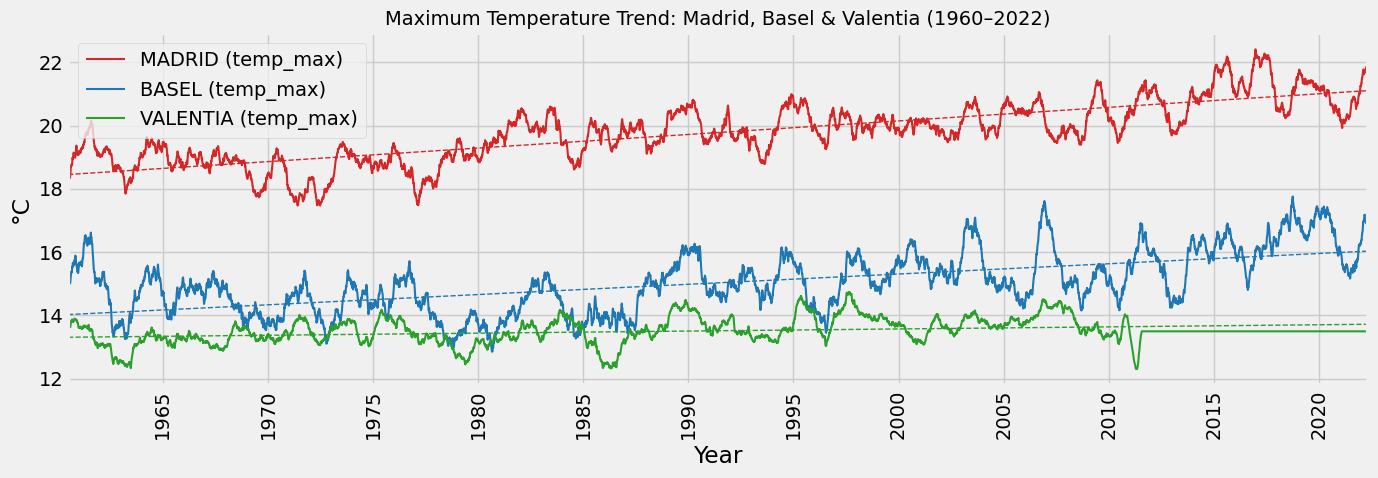

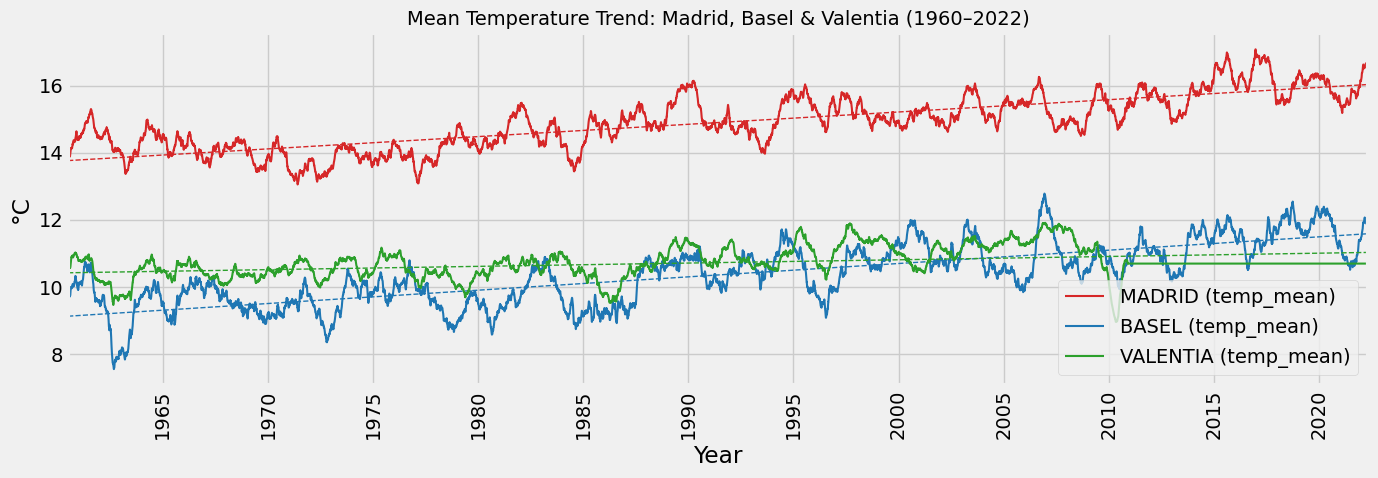

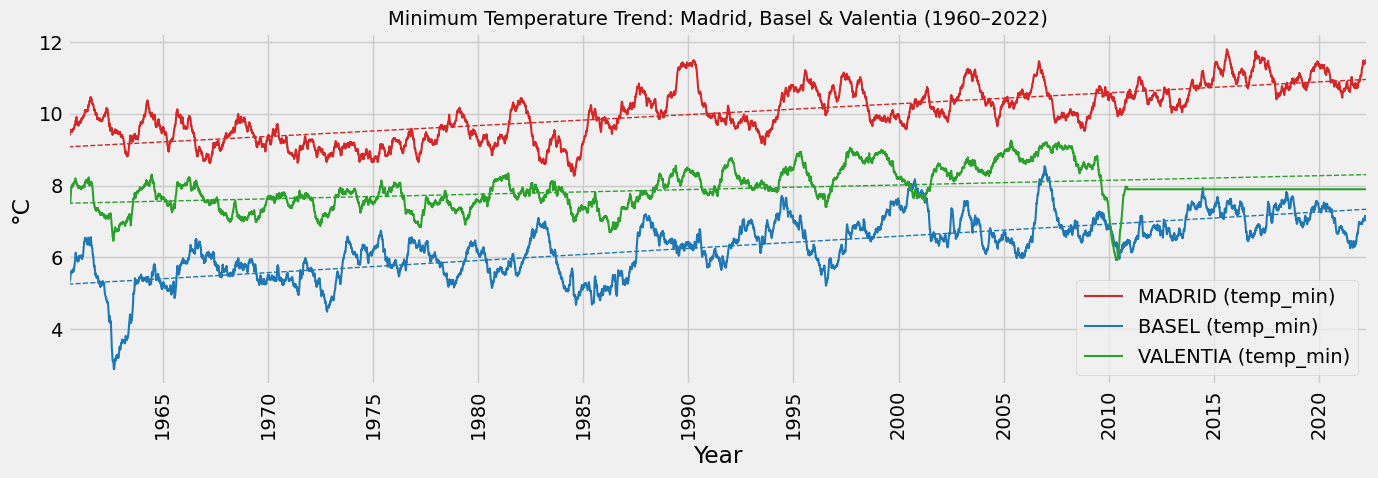

In [223]:
import matplotlib.dates as mdates

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from sklearn.linear_model import LinearRegression

# Parameters
window_size = 365
stations = ["MADRID", "BASEL", "VALENTIA"]
features = ["temp_max", "temp_mean", "temp_min"]
titles = ["Maximum Temperature", "Mean Temperature", "Minimum Temperature"]
station_colors = {"MADRID": "tab:red", "BASEL": "tab:blue", "VALENTIA": "tab:green"}

# Loop through each feature
for feature, title in zip(features, titles):
    plt.figure(figsize=(14, 5))

    for station in stations:
        col_name = f"{station}_{feature}"
        
        # Smooth and drop NaNs
        smoothed = weather_temp_date[col_name].rolling(window=window_size, center=True).mean().dropna()

        x_dates = smoothed.index
        y_vals = smoothed.values

        # Convert dates to ordinal (numeric) for regression
        x_ordinal = x_dates.map(pd.Timestamp.toordinal).values.reshape(-1, 1)

        # Fit linear regression
        model = LinearRegression()
        model.fit(x_ordinal, y_vals)
        y_trend = model.predict(x_ordinal)

        # Plot rolling line
        plt.plot(x_dates, y_vals, color=station_colors[station], label=f"{station} ({feature})", linewidth=1.5)

        # Plot trendline
        plt.plot(x_dates, y_trend, linestyle='--', color=station_colors[station], linewidth=1)

    plt.title(f"{title} Trend: Madrid, Basel & Valentia (1960–2022)", fontsize=14)
    plt.xlabel("Year")
    plt.ylabel("°C")
    plt.grid(True)
    plt.legend()

    # Fix x-axis
    plt.xlim(x_dates.min(), x_dates.max())
    plt.gca().xaxis.set_major_locator(mdates.YearLocator(5))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

### Comment: All 3 of VALENTIA weather station features' rolling 365-day time series data flatline from ~2012 onward. Speculation is that the station crew went out for Guinness and never returned.  Because this loss of data represents > 5% of VALENTIA weather station's entire range of observations, VALENTIA will be excluded going forward from both the weather and answers datasets. Exclusion is also based on the fact that the material omission of all 3 temperature data features for VALENTIA happens toward the end of the 60+ year temporal range.

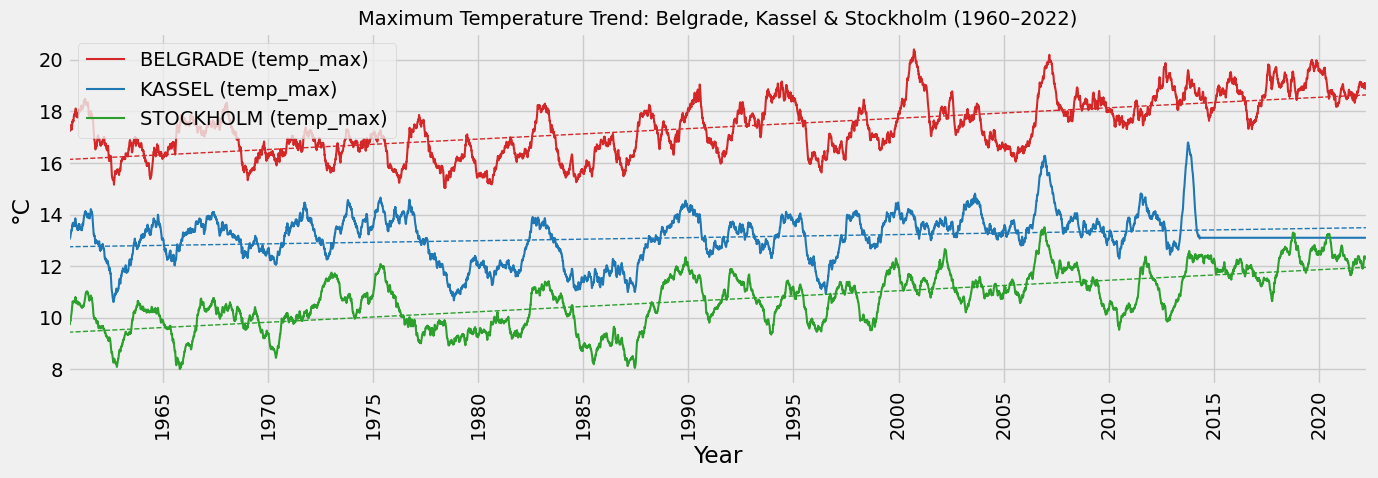

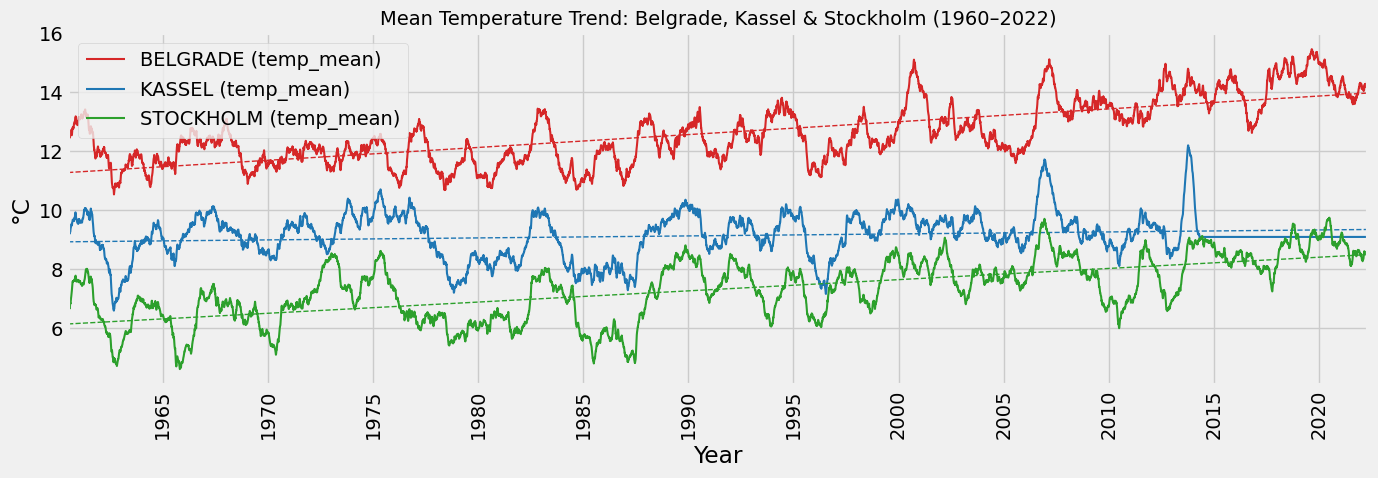

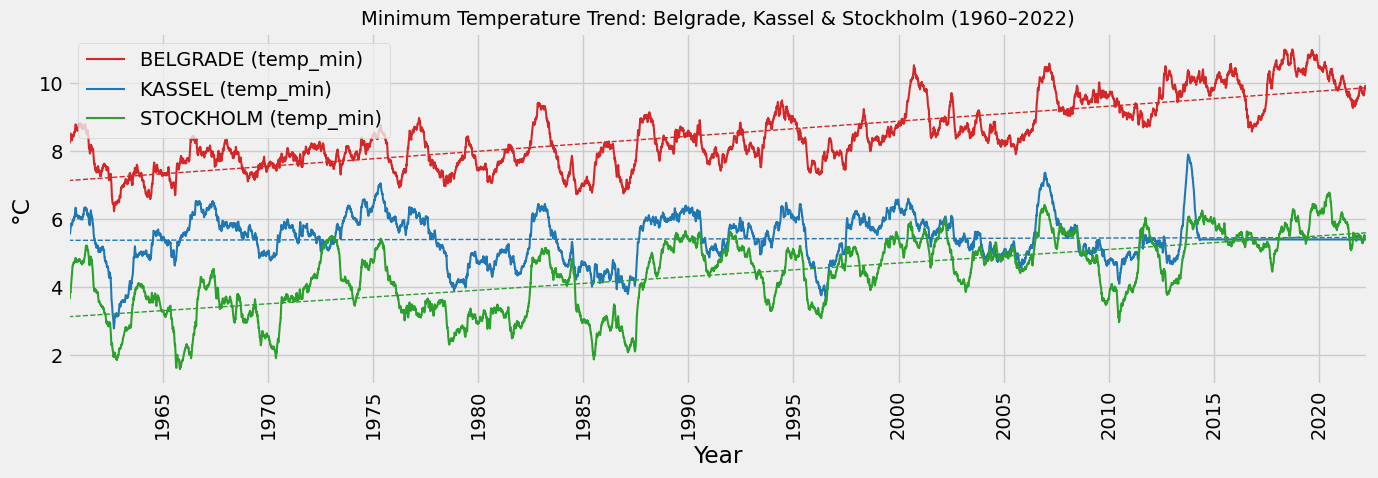

In [237]:
# Parameters
window_size = 365
stations = ["BELGRADE", "KASSEL", "STOCKHOLM"]
features = ["temp_max", "temp_mean", "temp_min"]
titles = ["Maximum Temperature", "Mean Temperature", "Minimum Temperature"]
station_colors = {"BELGRADE": "tab:red", "KASSEL": "tab:blue", "STOCKHOLM": "tab:green"}

# Loop through each feature
for feature, title in zip(features, titles):
    plt.figure(figsize=(14, 5))

    for station in stations:
        col_name = f"{station}_{feature}"
        
        # Smooth and drop NaNs
        smoothed = weather_temp_date[col_name].rolling(window=window_size, center=True).mean().dropna()

        x_dates = smoothed.index
        y_vals = smoothed.values

        # Convert dates to ordinal (numeric) for regression
        x_ordinal = x_dates.map(pd.Timestamp.toordinal).values.reshape(-1, 1)

        # Fit linear regression
        model = LinearRegression()
        model.fit(x_ordinal, y_vals)
        y_trend = model.predict(x_ordinal)

        # Plot rolling line
        plt.plot(x_dates, y_vals, color=station_colors[station], label=f"{station} ({feature})", linewidth=1.5)

        # Plot trendline
        plt.plot(x_dates, y_trend, linestyle='--', color=station_colors[station], linewidth=1)

    plt.title(f"{title} Trend: Belgrade, Kassel & Stockholm (1960–2022)", fontsize=14)
    plt.xlabel("Year")
    plt.ylabel("°C")
    plt.grid(True)
    plt.legend()

    # Fix x-axis
    plt.xlim(x_dates.min(), x_dates.max())
    plt.gca().xaxis.set_major_locator(mdates.YearLocator(5))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

### Comment: All 3 of KASSEL weather station features' rolling 365-day time series data flatline from ~2014 onward. Speculation is that the culprit this time was Hefeweizen.  Because this loss of data represents > 5% of KASSEL weather station's entire range of observations, KASSEL -- like VALENTIA -- will be excluded going forward from both the weather and answers datasets. Exclusion is also based on the fact that the material omission of all 3 temperature data features for KASSEL happens toward the end of the 60+ year temporal range.

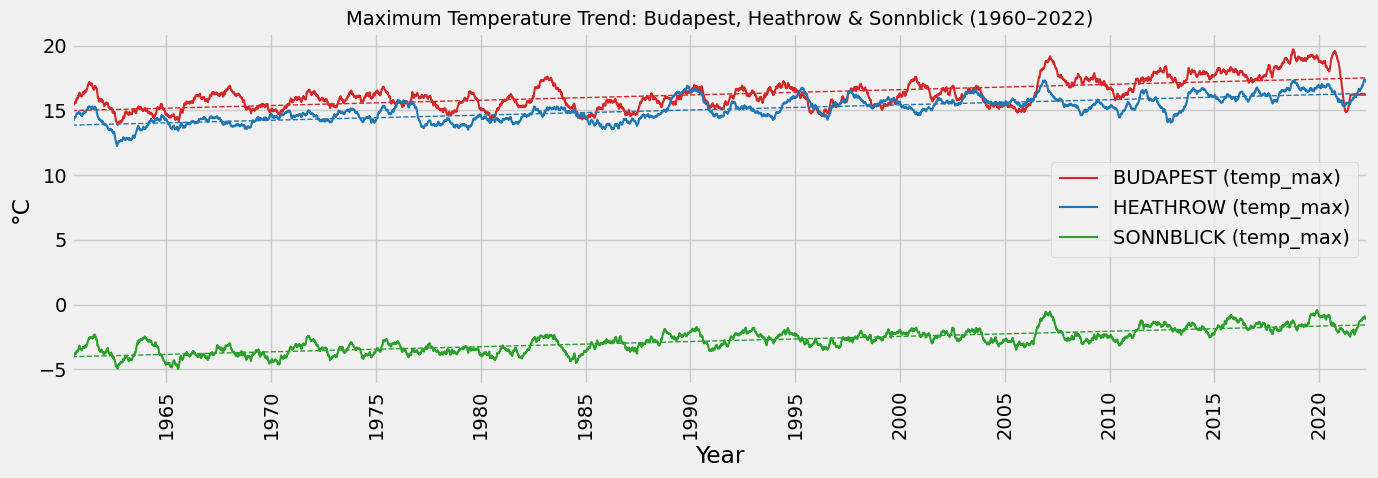

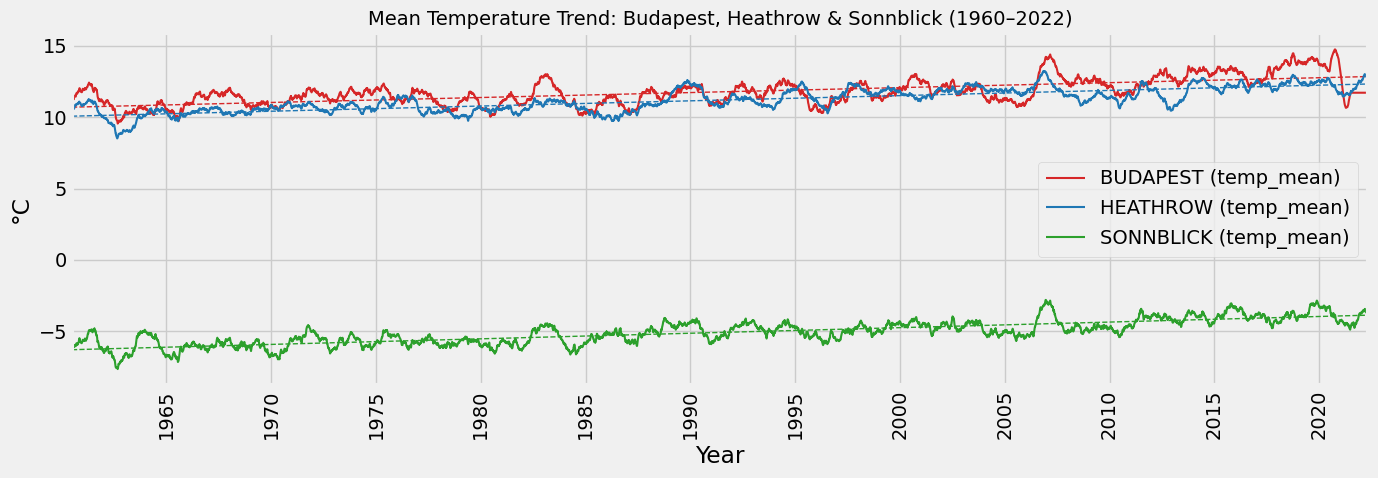

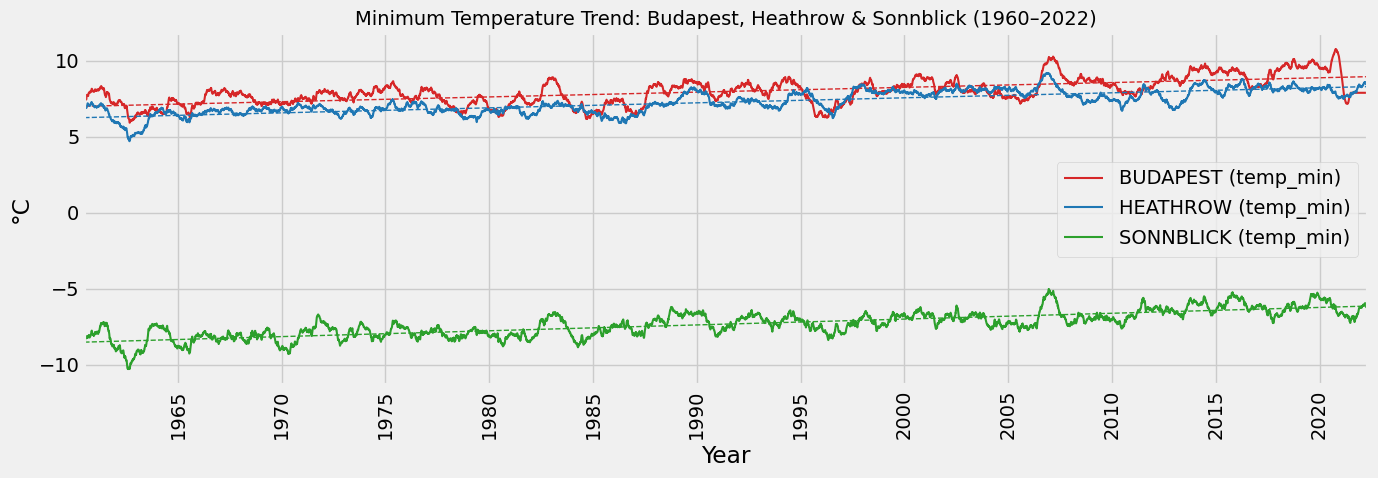

In [235]:
# Parameters
window_size = 365
stations = ["BUDAPEST", "HEATHROW", "SONNBLICK"]
features = ["temp_max", "temp_mean", "temp_min"]
titles = ["Maximum Temperature", "Mean Temperature", "Minimum Temperature"]
station_colors = {"BUDAPEST": "tab:red", "HEATHROW": "tab:blue", "SONNBLICK": "tab:green"}

# Loop through each feature
for feature, title in zip(features, titles):
    plt.figure(figsize=(14, 5))

    for station in stations:
        col_name = f"{station}_{feature}"
        
        # Smooth and drop NaNs
        smoothed = weather_temp_date[col_name].rolling(window=window_size, center=True).mean().dropna()

        x_dates = smoothed.index
        y_vals = smoothed.values

        # Convert dates to ordinal (numeric) for regression
        x_ordinal = x_dates.map(pd.Timestamp.toordinal).values.reshape(-1, 1)

        # Fit linear regression
        model = LinearRegression()
        model.fit(x_ordinal, y_vals)
        y_trend = model.predict(x_ordinal)

        # Plot rolling line
        plt.plot(x_dates, y_vals, color=station_colors[station], label=f"{station} ({feature})", linewidth=1.5)

        # Plot trendline
        plt.plot(x_dates, y_trend, linestyle='--', color=station_colors[station], linewidth=1)

    plt.title(f"{title} Trend: Budapest, Heathrow & Sonnblick (1960–2022)", fontsize=14)
    plt.xlabel("Year")
    plt.ylabel("°C")
    plt.grid(True)
    plt.legend()

    # Fix x-axis
    plt.xlim(x_dates.min(), x_dates.max())
    plt.gca().xaxis.set_major_locator(mdates.YearLocator(5))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

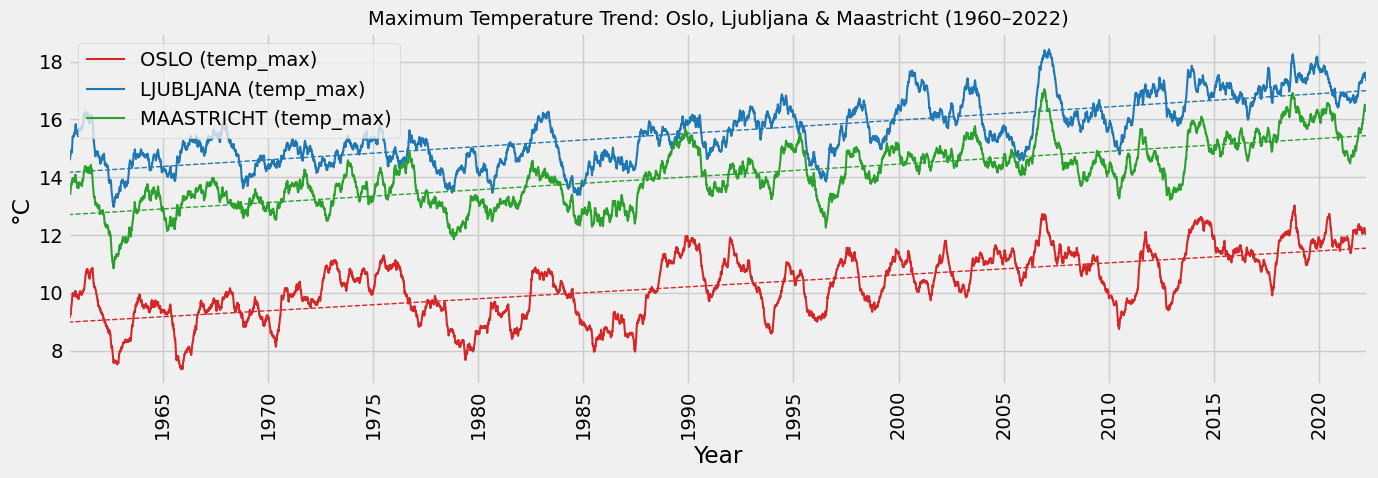

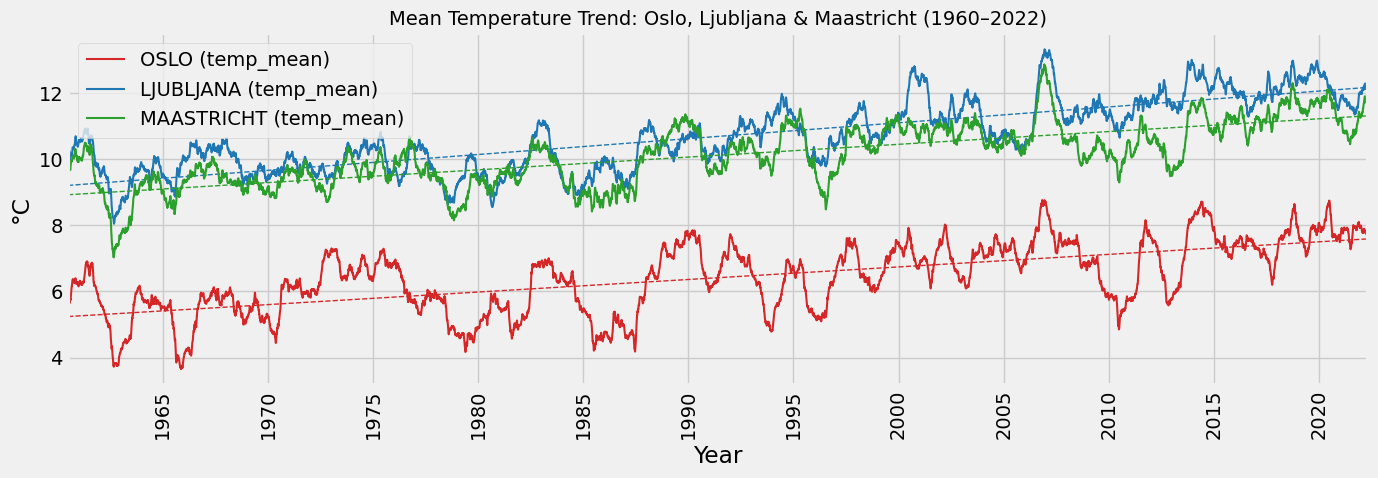

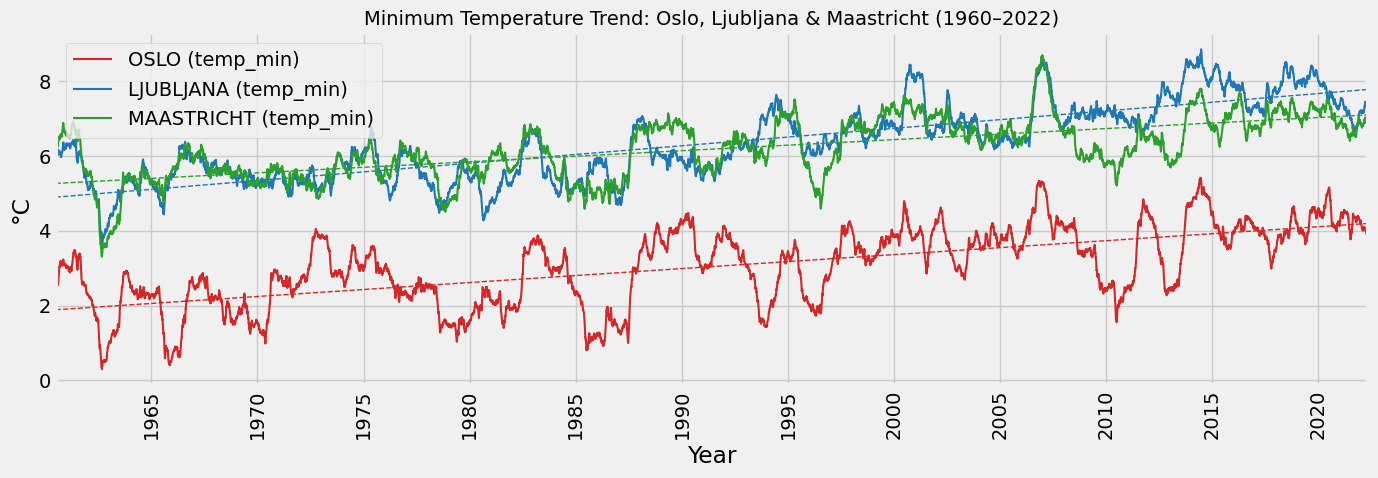

In [271]:
# Parameters
window_size = 365
stations = ["OSLO", "LJUBLJANA", "MAASTRICHT"]
features = ["temp_max", "temp_mean", "temp_min"]
titles = ["Maximum Temperature", "Mean Temperature", "Minimum Temperature"]
station_colors = {"OSLO": "tab:red", "LJUBLJANA": "tab:blue", "MAASTRICHT": "tab:green"}

# Loop through each feature
for feature, title in zip(features, titles):
    plt.figure(figsize=(14, 5))

    for station in stations:
        col_name = f"{station}_{feature}"
        
        # Smooth and drop NaNs
        smoothed = weather_temp_date[col_name].rolling(window=window_size, center=True).mean().dropna()

        x_dates = smoothed.index
        y_vals = smoothed.values

        # Convert dates to ordinal (numeric) for regression
        x_ordinal = x_dates.map(pd.Timestamp.toordinal).values.reshape(-1, 1)

        # Fit linear regression
        model = LinearRegression()
        model.fit(x_ordinal, y_vals)
        y_trend = model.predict(x_ordinal)

        # Plot rolling line
        plt.plot(x_dates, y_vals, color=station_colors[station], label=f"{station} ({feature})", linewidth=1.5)

        # Plot trendline
        plt.plot(x_dates, y_trend, linestyle='--', color=station_colors[station], linewidth=1)

    plt.title(f"{title} Trend: Oslo, Ljubljana & Maastricht (1960–2022)", fontsize=14)
    plt.xlabel("Year")
    plt.ylabel("°C")
    plt.grid(True)
    plt.legend()

    # Fix x-axis
    plt.xlim(x_dates.min(), x_dates.max())
    plt.gca().xaxis.set_major_locator(mdates.YearLocator(5))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

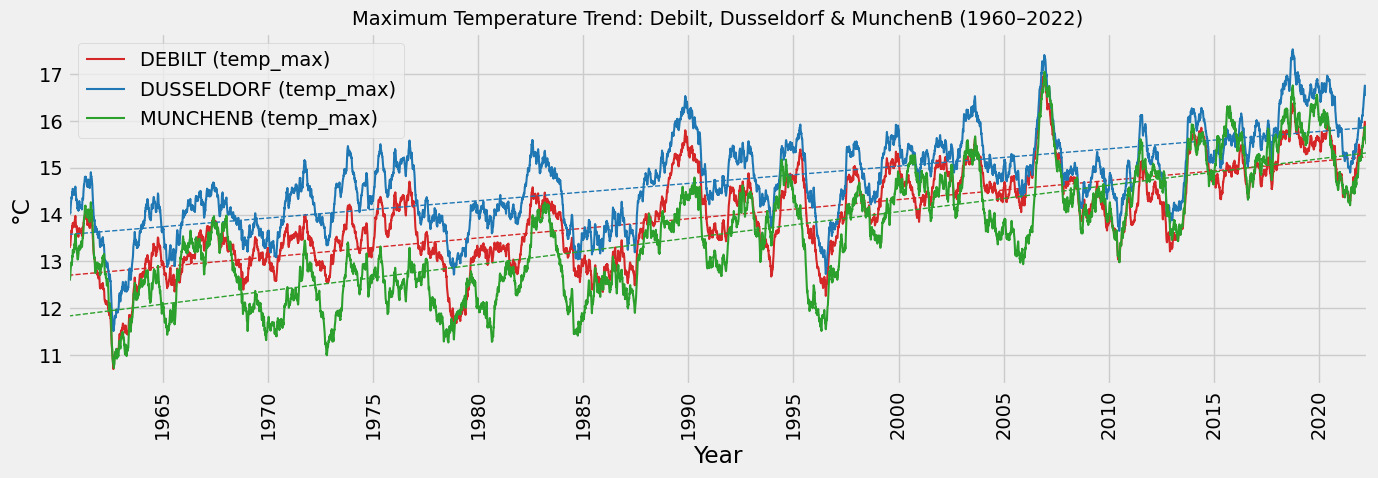

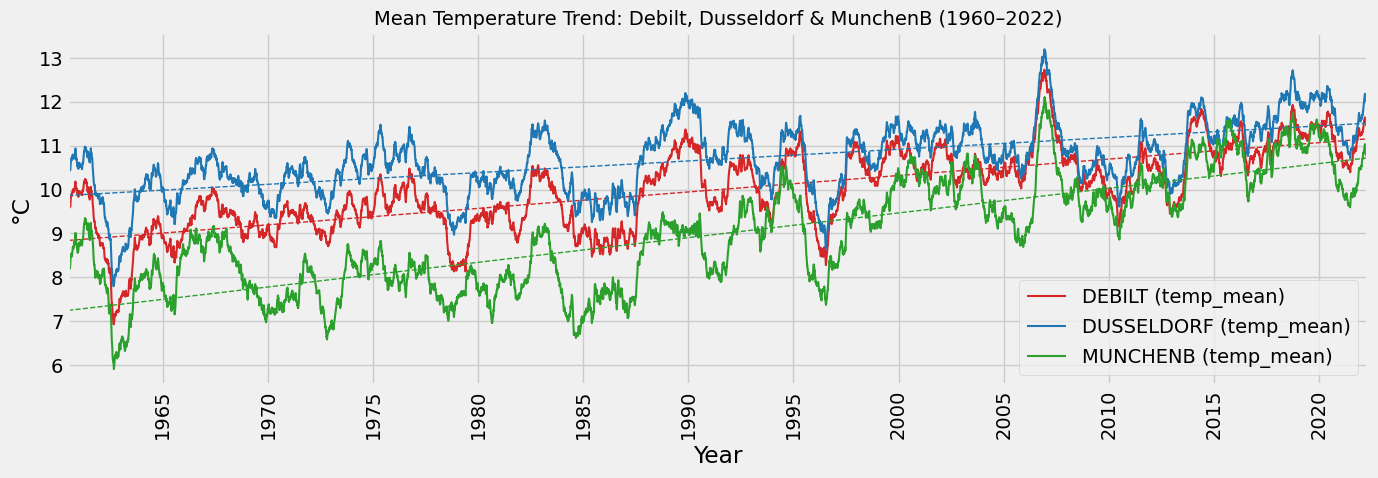

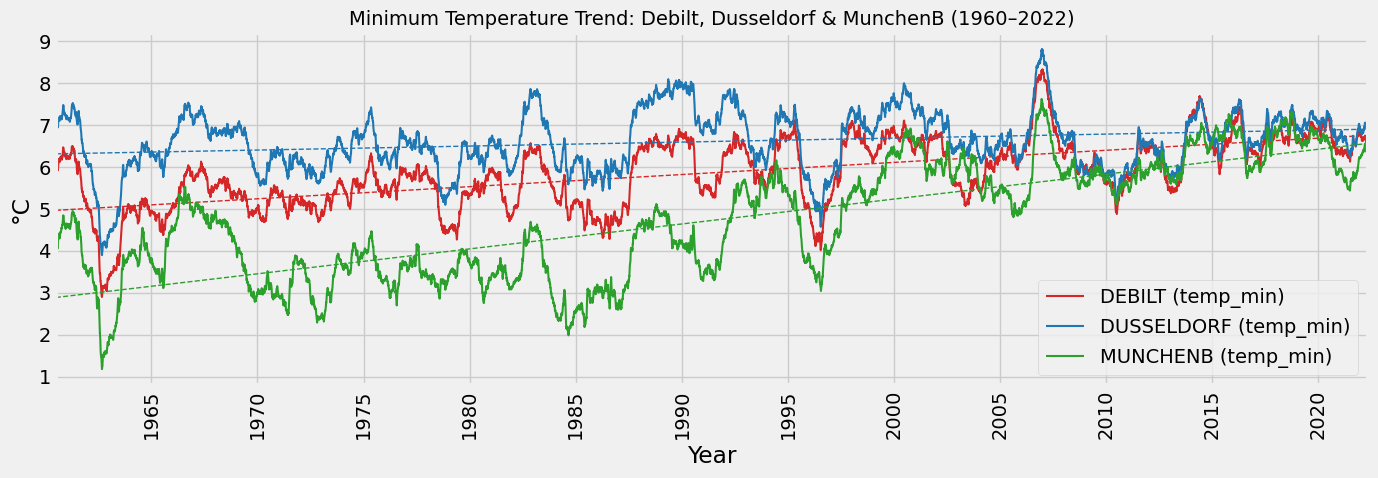

In [239]:
# Parameters
window_size = 365
stations = ["DEBILT", "DUSSELDORF", "MUNCHENB"]
features = ["temp_max", "temp_mean", "temp_min"]
titles = ["Maximum Temperature", "Mean Temperature", "Minimum Temperature"]
station_colors = {"DEBILT": "tab:red", "DUSSELDORF": "tab:blue", "MUNCHENB": "tab:green"}

# Loop through each feature
for feature, title in zip(features, titles):
    plt.figure(figsize=(14, 5))

    for station in stations:
        col_name = f"{station}_{feature}"
        
        # Smooth and drop NaNs
        smoothed = weather_temp_date[col_name].rolling(window=window_size, center=True).mean().dropna()

        x_dates = smoothed.index
        y_vals = smoothed.values

        # Convert dates to ordinal (numeric) for regression
        x_ordinal = x_dates.map(pd.Timestamp.toordinal).values.reshape(-1, 1)

        # Fit linear regression
        model = LinearRegression()
        model.fit(x_ordinal, y_vals)
        y_trend = model.predict(x_ordinal)

        # Plot rolling line
        plt.plot(x_dates, y_vals, color=station_colors[station], label=f"{station} ({feature})", linewidth=1.5)

        # Plot trendline
        plt.plot(x_dates, y_trend, linestyle='--', color=station_colors[station], linewidth=1)

    plt.title(f"{title} Trend: Debilt, Dusseldorf & MunchenB (1960–2022)", fontsize=14)
    plt.xlabel("Year")
    plt.ylabel("°C")
    plt.grid(True)
    plt.legend()

    # Fix x-axis
    plt.xlim(x_dates.min(), x_dates.max())
    plt.gca().xaxis.set_major_locator(mdates.YearLocator(5))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

### Comment: Excluding VALENTIA and KASSEL weather stations (due to insufficient data), the OLS-based trendlines for each of the 3 temperature features at all 13 weather stations ascend -- to varying degrees (slopes of lines) -- over the secular 60+ year temporal range. This may come as no surprise to some.

#### Removal of VALENTIA and KASSEL weather stations from the weather and answers datasets

In [260]:
# Drop KASSEL and VALENTIA features from the weather dataset

columns_to_drop = ['KASSEL_temp_mean','KASSEL_temp_min','KASSEL_temp_max', 'VALENTIA_temp_mean','VALENTIA_temp_min','VALENTIA_temp_max']
weather_temp_date.drop(columns=columns_to_drop, inplace=True)

In [262]:
weather_temp_date.shape

(22950, 39)

In [264]:
weather_temp_date.head(2)

BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  \
DATE                                                          
1960-01-01              6.5             0.8            10.9   
1960-01-02              6.1             3.3            10.1   

            BELGRADE_temp_mean  BELGRADE_temp_min  BELGRADE_temp_max  \
DATE                                                                   
1960-01-01                 3.7               -0.9                7.9   
1960-01-02                 2.9                2.2                4.4   

            BUDAPEST_temp_mean  BUDAPEST_temp_min  BUDAPEST_temp_max  \
DATE                                                                   
1960-01-01                 2.4               -0.4                5.1   
1960-01-02                 2.3                1.4                3.1   

            DEBILT_temp_mean  ...  MUNCHENB_temp_max  OSLO_temp_mean  \
DATE                          ...                                      
1960-01-01               9.3  ...               10.4             4.9   
1960-01-02               7.7  ...               10.2             3.4   

            OSLO_temp_min  OSLO_temp_max  SONNBLICK_temp_mean  \
DATE                                                            
1960-01-01            3.8            5.9                 -5.9   
1960-01-02            2.8            4.9                 -9.5   

            SONNBLICK_temp_min  SONNBLICK_temp_max  STOCKHOLM_temp_mean  \
DATE                                                                      
1960-01-01                -8.5                -3.2                  4.2   
1960-01-02               -10.5                -8.5                  4.0   

            STOCKHOLM_temp_min  STOCKHOLM_temp_max  
DATE                                                
1960-01-01                 2.2                 4.9  
1960-01-02                 3.0                 5.0  

[2 rows x 39 columns]

In [266]:
weather_temp_date.tail(2)

BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  \
DATE                                                          
2022-10-30             15.4            11.6            21.1   
2022-10-31             13.5             9.9            19.2   

            BELGRADE_temp_mean  BELGRADE_temp_min  BELGRADE_temp_max  \
DATE                                                                   
2022-10-30                15.0                9.1               20.9   
2022-10-31                14.4               10.4               18.4   

            BUDAPEST_temp_mean  BUDAPEST_temp_min  BUDAPEST_temp_max  \
DATE                                                                   
2022-10-30                11.7                7.9               16.2   
2022-10-31                11.7                7.9               16.2   

            DEBILT_temp_mean  ...  MUNCHENB_temp_max  OSLO_temp_mean  \
DATE                          ...                                      
2022-10-30              14.4  ...               23.5             5.9   
2022-10-31              12.8  ...               19.6             9.2   

            OSLO_temp_min  OSLO_temp_max  SONNBLICK_temp_mean  \
DATE                                                            
2022-10-30            2.1            8.1                  3.4   
2022-10-31            7.5           13.3                  1.7   

            SONNBLICK_temp_min  SONNBLICK_temp_max  STOCKHOLM_temp_mean  \
DATE                                                                      
2022-10-30                 2.7                 4.1                  7.5   
2022-10-31                 0.7                 2.7                  9.7   

            STOCKHOLM_temp_min  STOCKHOLM_temp_max  
DATE                                                
2022-10-30                 5.1                12.4  
2022-10-31                 5.0                12.6  

[2 rows x 39 columns]

In [268]:
# Drop KASSEL and VALENTIA from the answers dataset

columns_to_drop = ['KASSEL_pleasant_weather', 'VALENTIA_pleasant_weather']
ans_full.drop(columns=columns_to_drop, inplace=True)

In [277]:
# If 'DATE' is a column, fix the index
if 'DATE' in ans_full.columns:
    ans_full['DATE'] = pd.to_datetime(ans_full['DATE'])
    ans_full.set_index('DATE', inplace=True)

In [279]:
print(ans_full.index.name)
print(ans_full.index.dtype)

DATE
datetime64[ns]


In [281]:
ans_full.shape

(22950, 13)

In [283]:
ans_full.head(2)

BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
DATE                                                            
1960-01-01                       0                          0   
1960-01-02                       0                          0   

            BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
DATE                                                             
1960-01-01                          0                        0   
1960-01-02                          0                        0   

            DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
DATE                                                                 
1960-01-01                            0                          0   
1960-01-02                            0                          0   

            LJUBLJANA_pleasant_weather  MAASTRICHT_pleasant_weather  \
DATE                                                                  
1960-01-01                           0                            0   
1960-01-02                           0                            0   

            MADRID_pleasant_weather  MUNCHENB_pleasant_weather  \
DATE                                                             
1960-01-01                        0                          0   
1960-01-02                        0                          0   

            OSLO_pleasant_weather  SONNBLICK_pleasant_weather  \
DATE                                                            
1960-01-01                      0                           0   
1960-01-02                      0                           0   

            STOCKHOLM_pleasant_weather  
DATE                                    
1960-01-01                           0  
1960-01-02                           0

In [285]:
ans_full.tail(2)

BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
DATE                                                            
2022-10-30                       0                          0   
2022-10-31                       0                          0   

            BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
DATE                                                             
2022-10-30                          0                        0   
2022-10-31                          0                        0   

            DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
DATE                                                                 
2022-10-30                            0                          0   
2022-10-31                            0                          0   

            LJUBLJANA_pleasant_weather  MAASTRICHT_pleasant_weather  \
DATE                                                                  
2022-10-30                           0                            0   
2022-10-31                           0                            0   

            MADRID_pleasant_weather  MUNCHENB_pleasant_weather  \
DATE                                                             
2022-10-30                        0                          0   
2022-10-31                        0                          0   

            OSLO_pleasant_weather  SONNBLICK_pleasant_weather  \
DATE                                                            
2022-10-30                      0                           0   
2022-10-31                      0                           0   

            STOCKHOLM_pleasant_weather  
DATE                                    
2022-10-30                           0  
2022-10-31                           0

### Check a few temperature-based feature frequency distributions at some weather stations

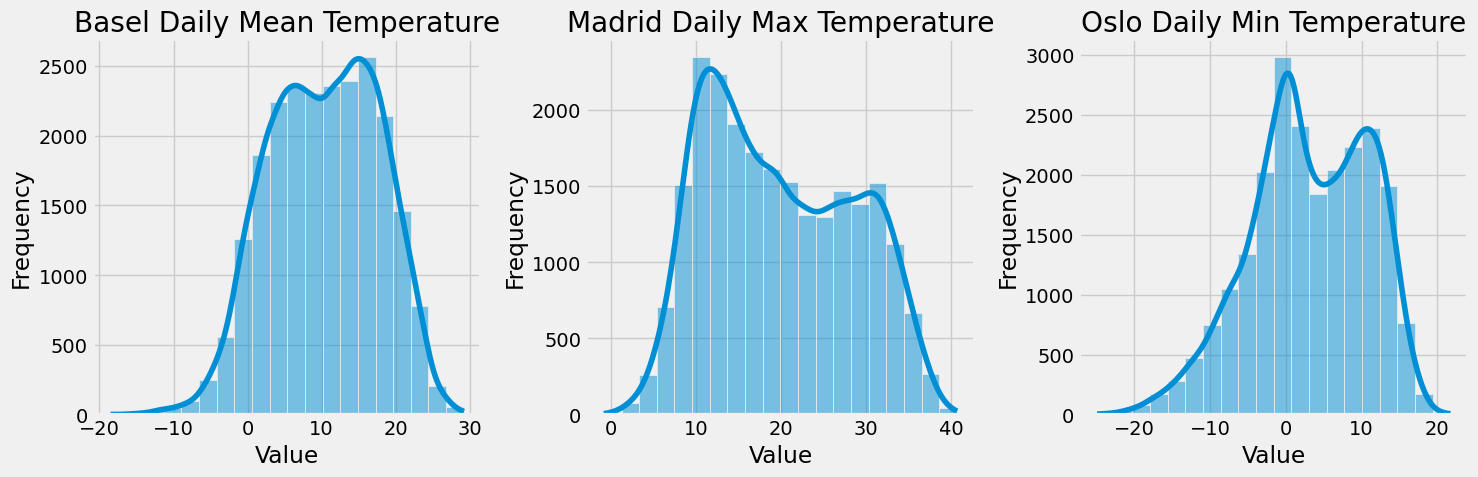

In [301]:
# Create the "plot grid" with a figure and a set of subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5)) # 1 row, 3 columns

# Plot histograms for each specified column
sns.histplot(weather_temp_date['BASEL_temp_mean'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Basel Daily Mean Temperature')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')

sns.histplot(weather_temp_date['MADRID_temp_max'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('Madrid Daily Max Temperature')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Frequency')

sns.histplot(weather_temp_date['OSLO_temp_min'], bins=20, kde=True, ax=axes[2])
axes[2].set_title('Oslo Daily Min Temperature')
axes[2].set_xlabel('Value')
axes[2].set_ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout() #

# Display the plots
plt.show()

##### Basel's mean temperature approximates a Normal distribution over 60+ years, while Madrid maximum temperatures and Oslo minimum temperatures are asymmetrical with a right-side skew.

### Stationarity checks

#### Comment: The weather time series data examined earlier is clearly trending and seasonal, visually speaking. However, as a formality we will confirm non-stationarity via a stationarity check of temperature features at 3 weather stations over the 60+ year period.

#### Decompose raw data: BASEL weather station daily mean temperature

In [312]:
# Decompose the time series using an additive model
# Note: correct period selection is crucial
# Choose 365 days for daily, to get an annual seasonality profile

from statsmodels.tsa.seasonal import seasonal_decompose

decomposition_basel_mean_temp = sm.tsa.seasonal_decompose(weather_temp_date['BASEL_temp_mean'], model='additive', period=365)

In [314]:
# Note at session start we imported the pylab library function rcParams
# This line (below) will define a fixed size for all special charts.
rcParams['figure.figsize'] = 18, 7

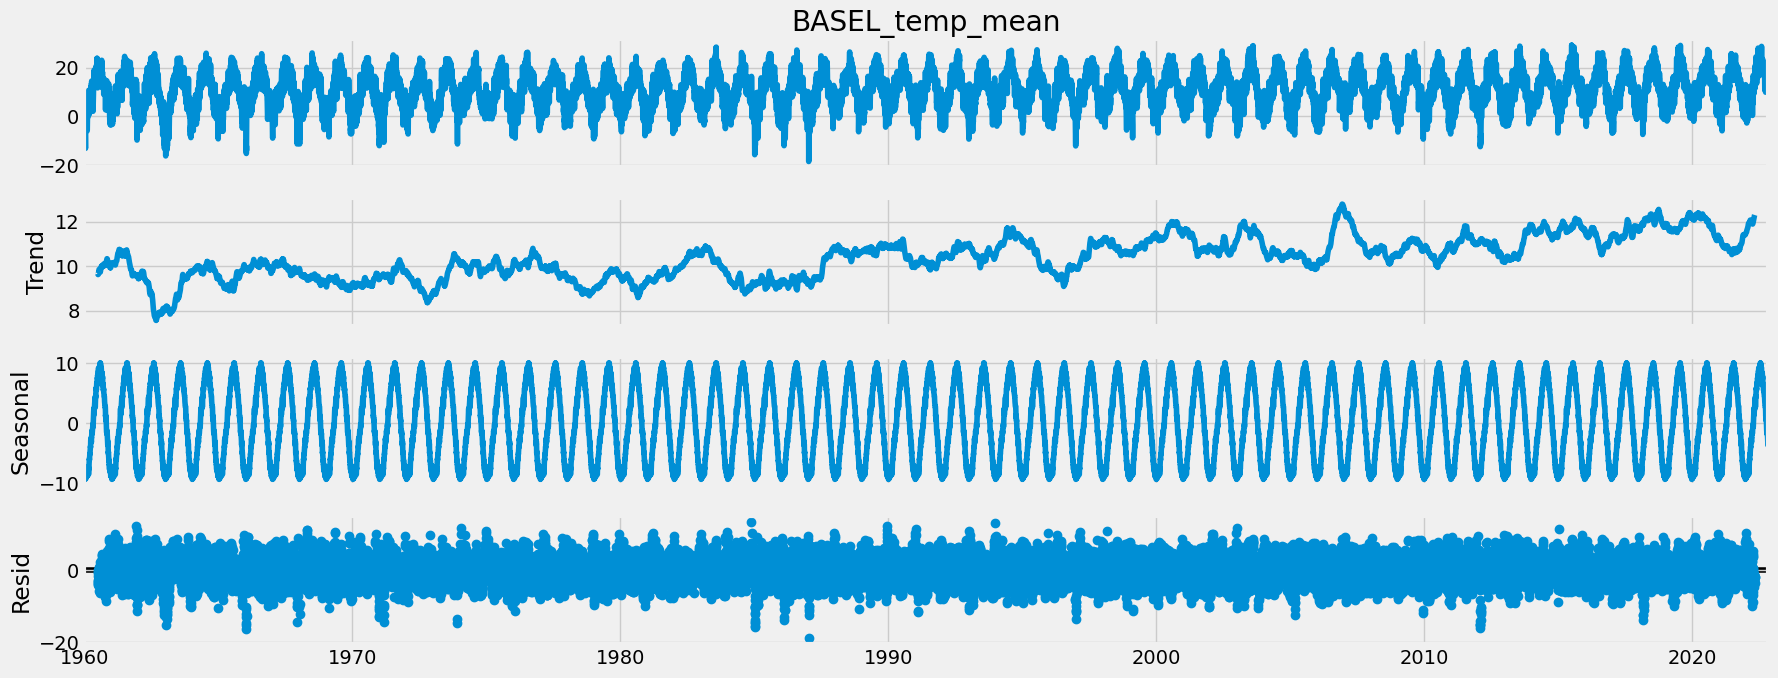

In [316]:
# Plot the separate components
decomposition_basel_mean_temp.plot()
plt.show()

#### Non-stationary.

#### Decompose raw data: MADRID weather station daily maximum temperature

In [327]:
decomposition_madrid_max_temp = sm.tsa.seasonal_decompose(weather_temp_date['MADRID_temp_max'], model='additive', period=365)

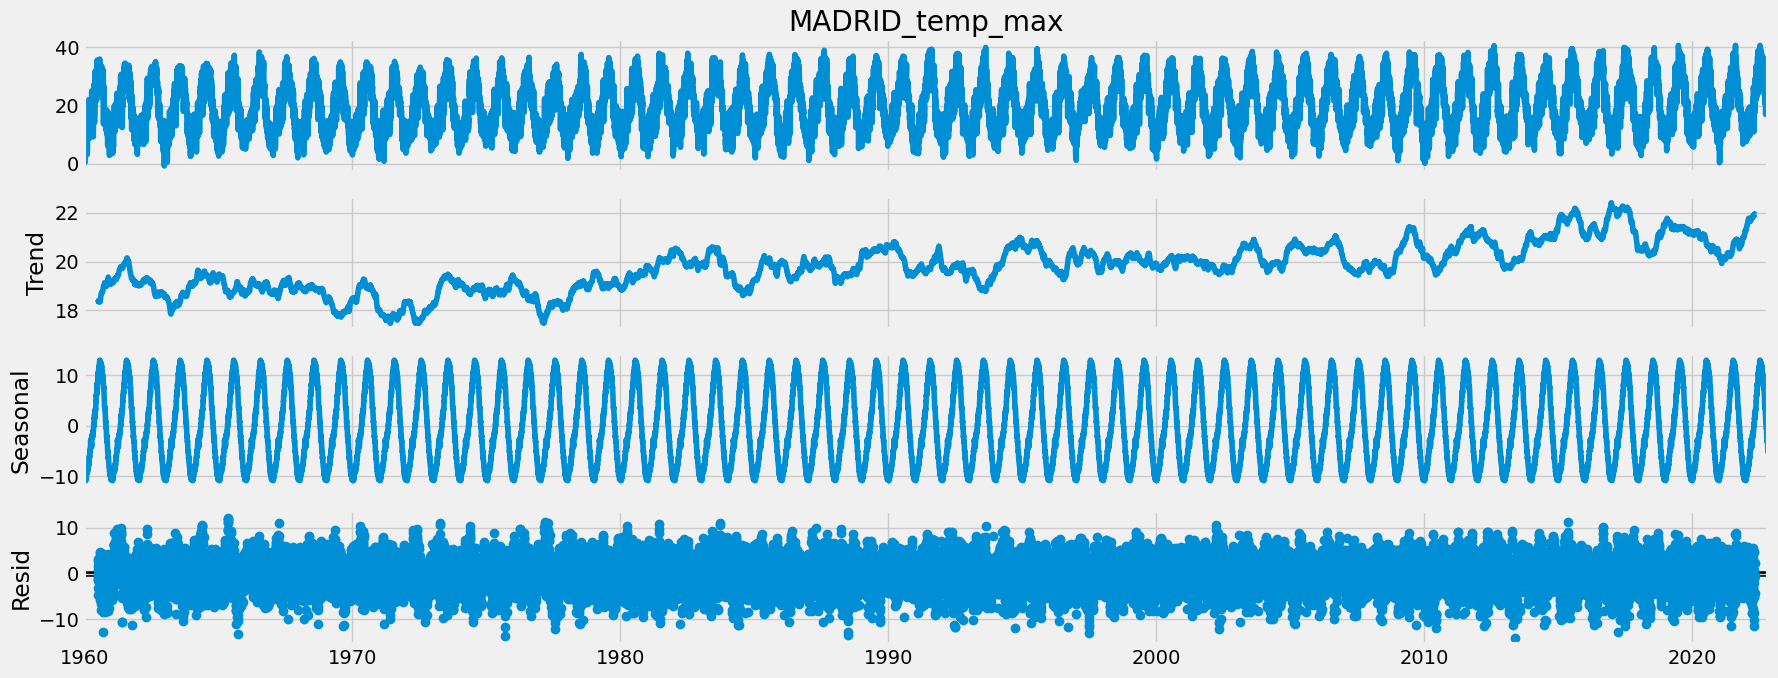

In [329]:
decomposition_madrid_max_temp.plot()
plt.show()

#### Non-stationary.

#### Decompose raw data: OSLO weather station daily minimum temperature

In [331]:
decomposition_oslo_min_temp = sm.tsa.seasonal_decompose(weather_temp_date['OSLO_temp_min'], model='additive', period=365)

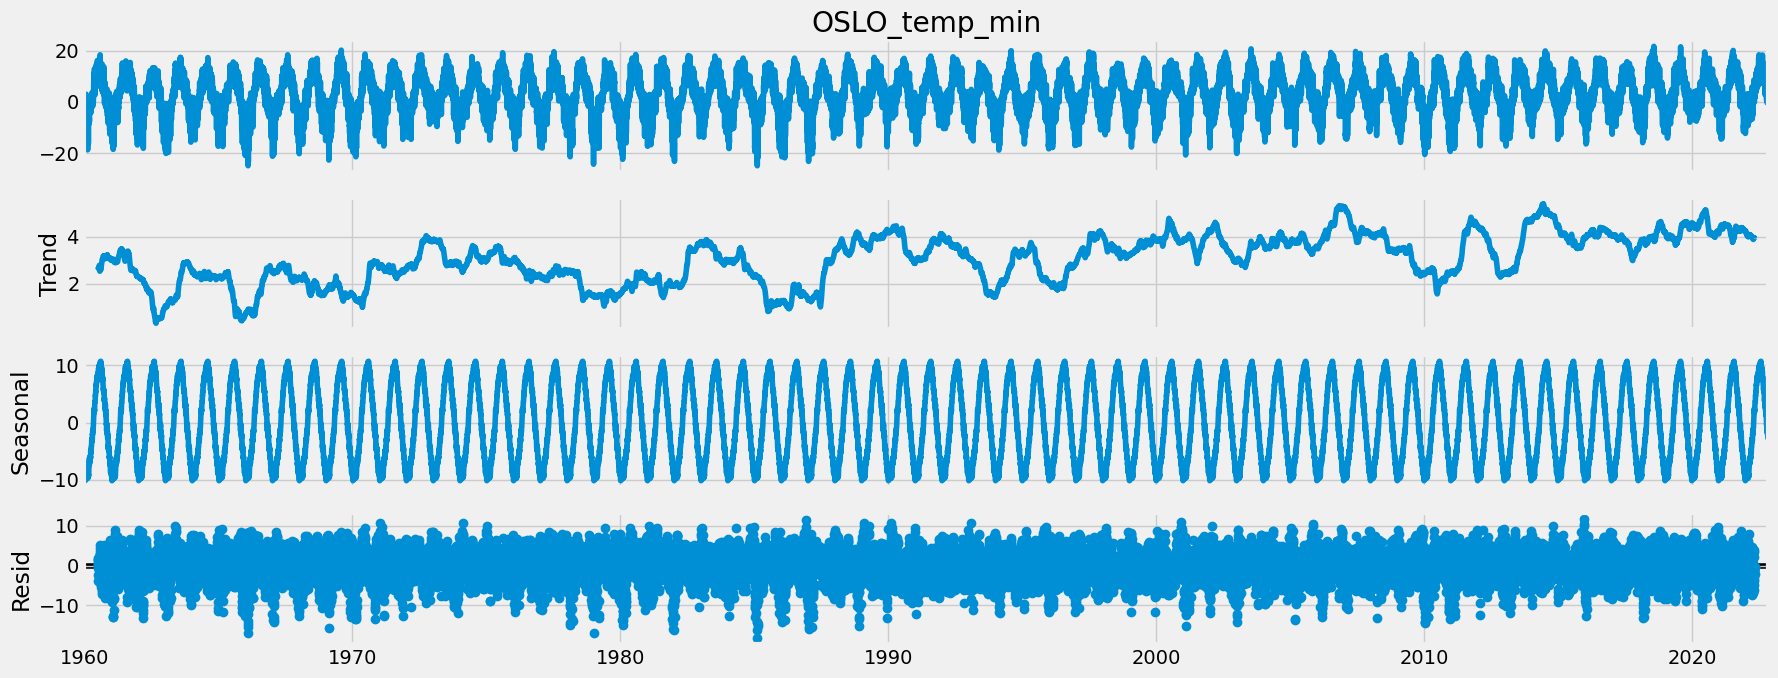

In [333]:
decomposition_oslo_min_temp.plot()
plt.show()

#### Non-stationary.

### Further stationarity diagnostics: ADF (Augmented Dickey Fuller) & KPSS tests, ACF (Autocorrelation Function) plot

#### Define multi-output function

In [344]:
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

def stationarity_diagnostics(series, lags=60, significance_level=0.05):
    """
    Runs ADF & KPSS tests and plots the ACF.
    - series: Pandas Series
    - lags: Number of lags for ACF plot
    - significance_level: Alpha threshold for p-value interpretation
    """
    
    print(f"=== Augmented Dickey-Fuller Test (H0: Non-stationary) ===")
    adf_result = adfuller(series.dropna(), autolag='AIC')
    adf_output = pd.Series(adf_result[0:4], index=['Test Statistic','p-value','# Lags Used','# Observations Used'])
    for key, value in adf_result[4].items():
        adf_output[f'Critical Value ({key})'] = value
    print(adf_output)
    if adf_result[1] < significance_level:
        print(f"ADF Conclusion: Reject H0 → Series is likely STATIONARY at {significance_level*100:.1f}% confidence.\n")
    else:
        print(f"ADF Conclusion: Fail to reject H0 → Series is likely NON-STATIONARY at {significance_level*100:.1f}% confidence.\n")

    print(f"=== KPSS Test (H0: Stationary) ===")
    try:
        kpss_result = kpss(series.dropna(), regression='c', nlags='auto')
        kpss_output = pd.Series(kpss_result[0:3], index=['Test Statistic','p-value','Lags Used'])
        for key, value in kpss_result[3].items():
            kpss_output[f'Critical Value ({key})'] = value
        print(kpss_output)
        if kpss_result[1] < significance_level:
            print(f"KPSS Conclusion: Reject H0 → Series is likely NON-STATIONARY at {significance_level*100:.1f}% confidence.\n")
        else:
            print(f"KPSS Conclusion: Fail to reject H0 → Series is likely STATIONARY at {significance_level*100:.1f}% confidence.\n")
    except Exception as e:
        print(f"KPSS test failed: {e}")

    # Plot ACF
    plt.figure(figsize=(10,4))
    plot_acf(series.dropna(), lags=lags)
    plt.title("Autocorrelation Function (ACF)")
    plt.show()

#### BASEL weather station daily mean temperature

=== Augmented Dickey-Fuller Test (H0: Non-stationary) ===
Test Statistic         -1.146622e+01
p-value                 5.402939e-21
# Lags Used             4.700000e+01
# Observations Used     2.290200e+04
Critical Value (1%)    -3.430636e+00
Critical Value (5%)    -2.861666e+00
Critical Value (10%)   -2.566837e+00
dtype: float64
ADF Conclusion: Reject H0 → Series is likely STATIONARY at 5.0% confidence.

=== KPSS Test (H0: Stationary) ===
Test Statistic            0.447905
p-value                   0.056507
Lags Used                89.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
KPSS Conclusion: Fail to reject H0 → Series is likely STATIONARY at 5.0% confidence.



<Figure size 1000x400 with 0 Axes>

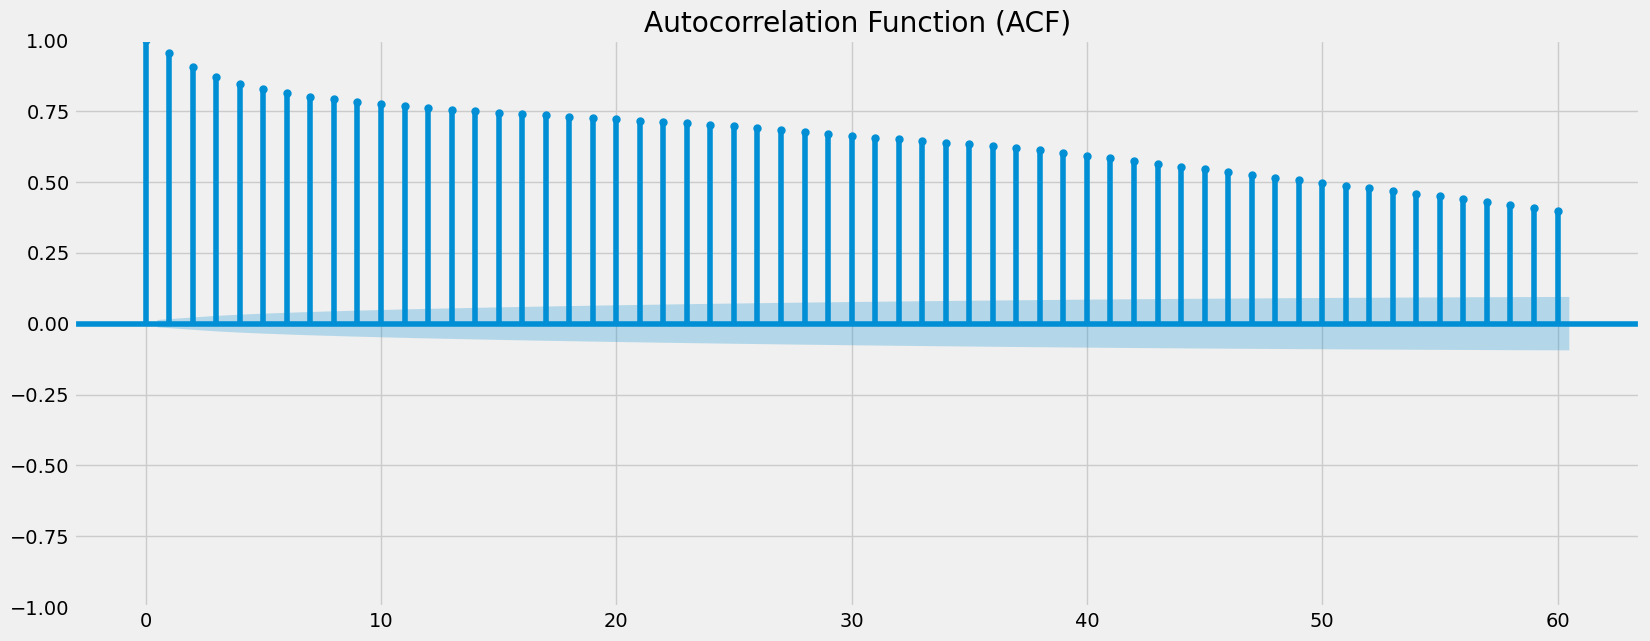

In [347]:
# Run multi-output function on BASEL daily mean temperature
stationarity_diagnostics(weather_temp_date['BASEL_temp_mean'], lags=60)

#### Comment: The earlier decomposition plot for this feature showed a clear secular ascending trend, despite the ADF and KPSS tests (above) declaring the time series as stationary.  It's not.  Both are statistical tests with assumptions about residuals, noise, sample size.  With daily climate data over 60+ years, huge N plus repeating strong seasonal cycles (the very definition of weather ... ) can make BOTH tests see the "seasonal stability" as "stationarity".  What the tests are really capturing here is a stable mean/variance WITHIN each season, but the ACF plot is the tie-breaker, it shows that the time series is still autocorrelated to the hilt.  In a truly stationary series, autocorrelation drops quickly and most lags stay inside the blue-colored confidence bands (except the first few lag columns).  That is not the case here. The original raw data is not stationary in the sense that's safe for ML models like ANN in particular.  Conclusion: The raw data series here is NOT stationary.

### 03. Data transformation via differencing

#### Comment: Data transformation via differencing, followed by z-score standardization, will be applied to the weather dataset to (1) stationarize the time series data; and (2) ensure that both the ANN and DecisionTreeClassifier models are fitted to a stationary dataset, for better performance.

In [357]:
# First differencing for all numeric columns
weather_temp_date_diff = weather_temp_date.diff(periods=1)

# Drop the first row because differencing creates a NaN there
weather_temp_date_diff = weather_temp_date_diff.dropna()

# Keep the same DatetimeIndex
print(weather_temp_date_diff.shape)
weather_temp_date_diff.head(3)

(22949, 39)


BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  \
DATE                                                          
1960-01-02             -0.4             2.5            -0.8   
1960-01-03              2.4             1.8            -0.2   
1960-01-04             -2.2            -1.3             0.7   

            BELGRADE_temp_mean  BELGRADE_temp_min  BELGRADE_temp_max  \
DATE                                                                   
1960-01-02                -0.8                3.1               -3.5   
1960-01-03                 0.2               -2.7                2.0   
1960-01-04                -1.1               -1.5               -3.4   

            BUDAPEST_temp_mean  BUDAPEST_temp_min  BUDAPEST_temp_max  \
DATE                                                                   
1960-01-02                -0.1                1.8               -2.0   
1960-01-03                 0.4                0.3                2.2   
1960-01-04                -0.7               -1.3               -0.9   

            DEBILT_temp_mean  ...  MUNCHENB_temp_max  OSLO_temp_mean  \
DATE                          ...                                      
1960-01-02              -1.6  ...               -0.2            -1.5   
1960-01-03              -0.9  ...               -2.2            -1.5   
1960-01-04              -0.1  ...               -2.6             1.1   

            OSLO_temp_min  OSLO_temp_max  SONNBLICK_temp_mean  \
DATE                                                            
1960-01-02           -1.0           -1.0                 -3.6   
1960-01-03           -2.2           -1.8                  0.0   
1960-01-04           -0.2            1.8                 -2.0   

            SONNBLICK_temp_min  SONNBLICK_temp_max  STOCKHOLM_temp_mean  \
DATE                                                                      
1960-01-02                -2.0                -5.3                 -0.2   
1960-01-03                 0.5                -0.4                 -1.6   
1960-01-04                -2.9                -1.1                 -1.2   

            STOCKHOLM_temp_min  STOCKHOLM_temp_max  
DATE                                                
1960-01-02                 0.8                 0.1  
1960-01-03                -1.7                -0.9  
1960-01-04                -0.9                -1.8  

[3 rows x 39 columns]

#### Drop the first row of the answers dataset to match exactly the adjusted temporal range of the weather dataset.

In [418]:
ans_full.drop(ans_full.index[0], inplace=True) 

In [420]:
ans_full.head(3)

BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
DATE                                                            
1960-01-02                       0                          0   
1960-01-03                       0                          0   
1960-01-04                       0                          0   

            BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
DATE                                                             
1960-01-02                          0                        0   
1960-01-03                          0                        0   
1960-01-04                          0                        0   

            DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
DATE                                                                 
1960-01-02                            0                          0   
1960-01-03                            0                          0   
1960-01-04                            0                          0   

            LJUBLJANA_pleasant_weather  MAASTRICHT_pleasant_weather  \
DATE                                                                  
1960-01-02                           0                            0   
1960-01-03                           0                            0   
1960-01-04                           0                            0   

            MADRID_pleasant_weather  MUNCHENB_pleasant_weather  \
DATE                                                             
1960-01-02                        0                          0   
1960-01-03                        0                          0   
1960-01-04                        0                          0   

            OSLO_pleasant_weather  SONNBLICK_pleasant_weather  \
DATE                                                            
1960-01-02                      0                           0   
1960-01-03                      0                           0   
1960-01-04                      0                           0   

            STOCKHOLM_pleasant_weather  
DATE                                    
1960-01-02                           0  
1960-01-03                           0  
1960-01-04                           0

In [422]:
ans_full.shape

(22949, 13)

### 04. Scaling (standardization) using z-score method

#### Use the z-score method to standardize the differenced dataset as the second data transformation step.

In [425]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit and transform differenced data
scaled_values = scaler.fit_transform(weather_temp_date_diff)

# Re-wrap into DataFrame with same index & column names
weather_temp_date_diff_std = pd.DataFrame(
    scaled_values,
    index=weather_temp_date_diff.index,
    columns=weather_temp_date_diff.columns
)

# Quick check
print(weather_temp_date_diff_std.shape)
print(weather_temp_date_diff_std.head(3))

(22949, 39)
            BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  \
DATE                                                          
1960-01-02        -0.181094        1.031400       -0.240839   
1960-01-03         1.085600        0.742562       -0.060291   
1960-01-04        -0.995398       -0.536576        0.210530   

            BELGRADE_temp_mean  BELGRADE_temp_min  BELGRADE_temp_max  \
DATE                                                                   
1960-01-02           -0.287909           1.197120          -0.970236   
1960-01-03            0.071768          -1.043009           0.554221   
1960-01-04           -0.395812          -0.579534          -0.942518   

            BUDAPEST_temp_mean  BUDAPEST_temp_min  BUDAPEST_temp_max  \
DATE                                                                   
1960-01-02           -0.046856           0.769020          -0.722596   
1960-01-03            0.186479           0.128041           0.794488   
1960-01-04           -0

### Run stationarity check on some differenced & z-score standardized features for a few stations in the weather dataset.

#### BASEL mean temperature

In [430]:
decomposition_basel_mean_temp_diff_std = sm.tsa.seasonal_decompose(weather_temp_date_diff_std['BASEL_temp_mean'], model='additive', period=365)

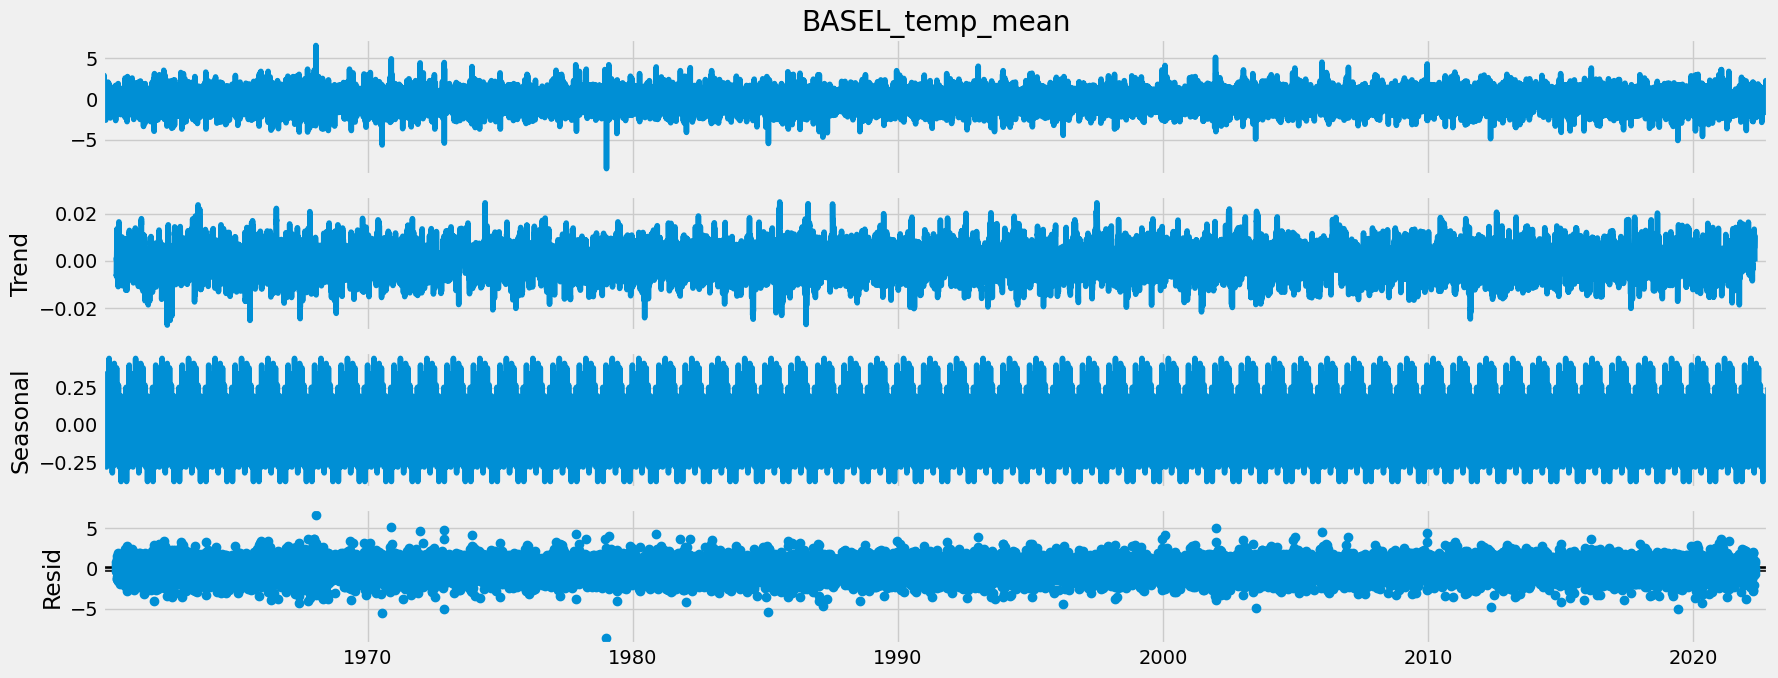

In [432]:
# Plot the separate components
decomposition_basel_mean_temp_diff_std.plot()
plt.show()

=== Augmented Dickey-Fuller Test (H0: Non-stationary) ===
Test Statistic            -22.890963
p-value                     0.000000
# Lags Used                44.000000
# Observations Used     22904.000000
Critical Value (1%)        -3.430636
Critical Value (5%)        -2.861666
Critical Value (10%)       -2.566837
dtype: float64
ADF Conclusion: Reject H0 → Series is likely STATIONARY at 5.0% confidence.

=== KPSS Test (H0: Stationary) ===
Test Statistic             0.004014
p-value                    0.100000
Lags Used                243.000000
Critical Value (10%)       0.347000
Critical Value (5%)        0.463000
Critical Value (2.5%)      0.574000
Critical Value (1%)        0.739000
dtype: float64
KPSS Conclusion: Fail to reject H0 → Series is likely STATIONARY at 5.0% confidence.



<Figure size 1000x400 with 0 Axes>

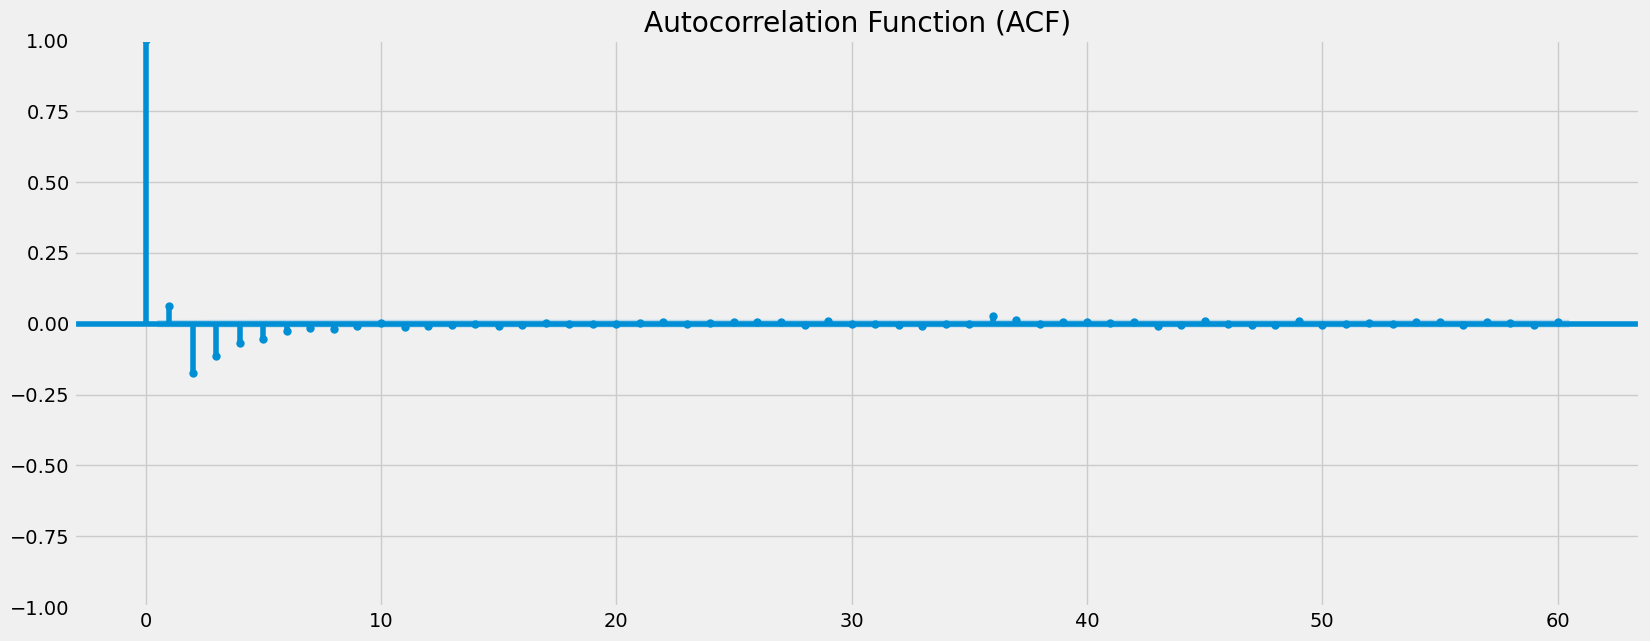

In [434]:
# Run multi-output function on BASEL daily mean temperature
stationarity_diagnostics(weather_temp_date_diff_std['BASEL_temp_mean'], lags=60)

#### Stationary.

#### MADRID maximum temperature

In [439]:
decomposition_madrid_max_temp_diff_std = sm.tsa.seasonal_decompose(weather_temp_date_diff_std['MADRID_temp_max'], model='additive', period=365)

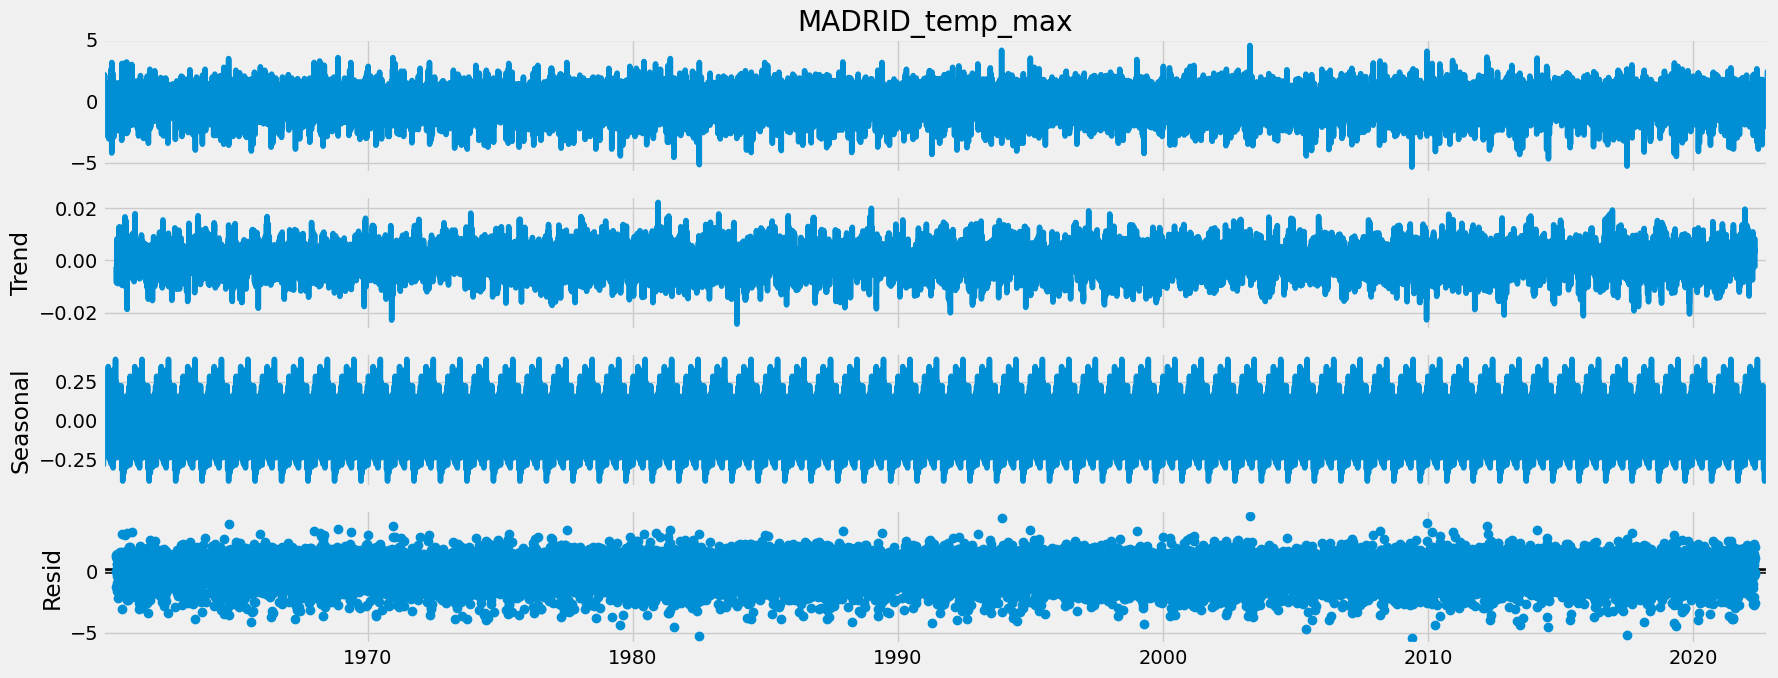

In [441]:
# Plot the separate components
decomposition_madrid_max_temp_diff_std.plot()
plt.show()

=== Augmented Dickey-Fuller Test (H0: Non-stationary) ===
Test Statistic         -1.765308e+01
p-value                 3.712251e-30
# Lags Used             4.700000e+01
# Observations Used     2.290100e+04
Critical Value (1%)    -3.430636e+00
Critical Value (5%)    -2.861666e+00
Critical Value (10%)   -2.566837e+00
dtype: float64
ADF Conclusion: Reject H0 → Series is likely STATIONARY at 5.0% confidence.

=== KPSS Test (H0: Stationary) ===
Test Statistic             0.00752
p-value                    0.10000
Lags Used                262.00000
Critical Value (10%)       0.34700
Critical Value (5%)        0.46300
Critical Value (2.5%)      0.57400
Critical Value (1%)        0.73900
dtype: float64
KPSS Conclusion: Fail to reject H0 → Series is likely STATIONARY at 5.0% confidence.



<Figure size 1000x400 with 0 Axes>

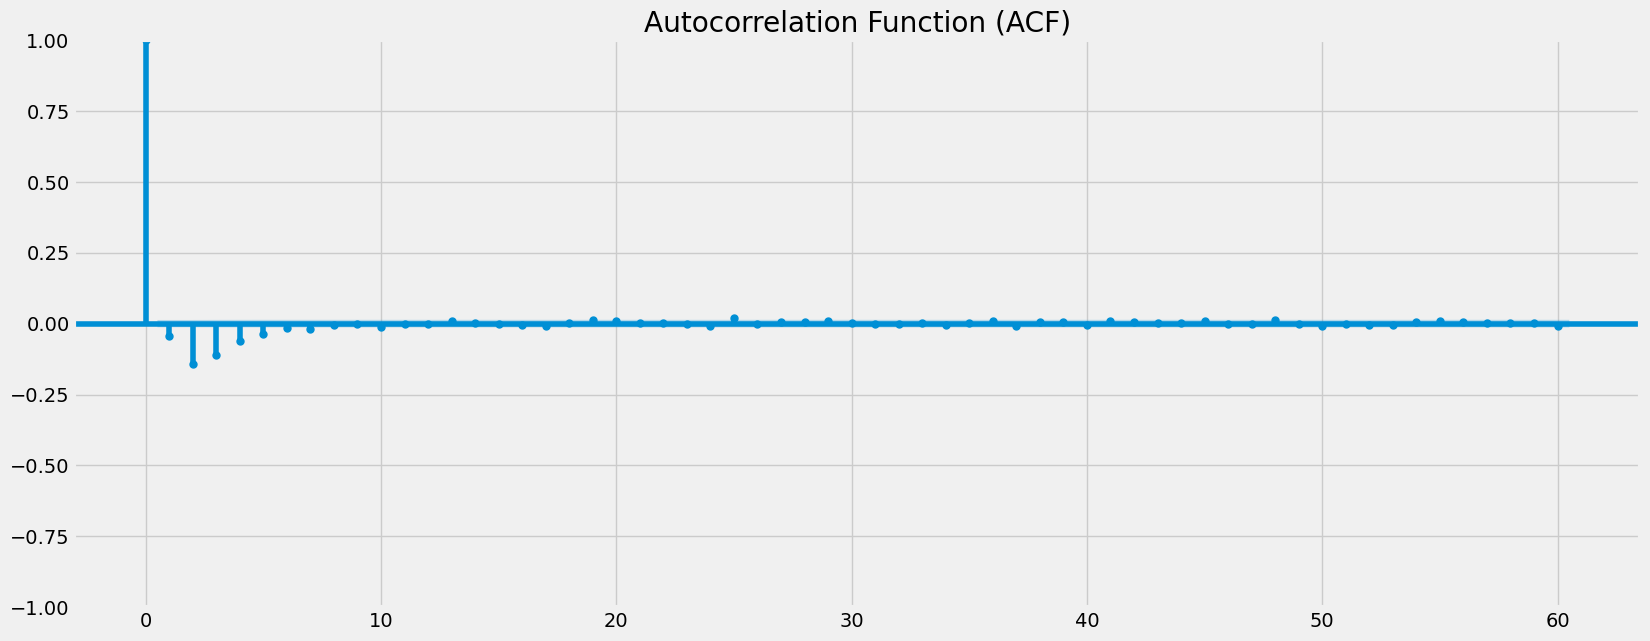

In [443]:
# Run multi-output function on MADRID daily maximum temperature
stationarity_diagnostics(weather_temp_date_diff_std['MADRID_temp_max'], lags=60)

#### Stationary.

#### OSLO minimum temperature

In [447]:
decomposition_oslo_min_temp_diff_std = sm.tsa.seasonal_decompose(weather_temp_date_diff_std['OSLO_temp_min'], model='additive', period=365)

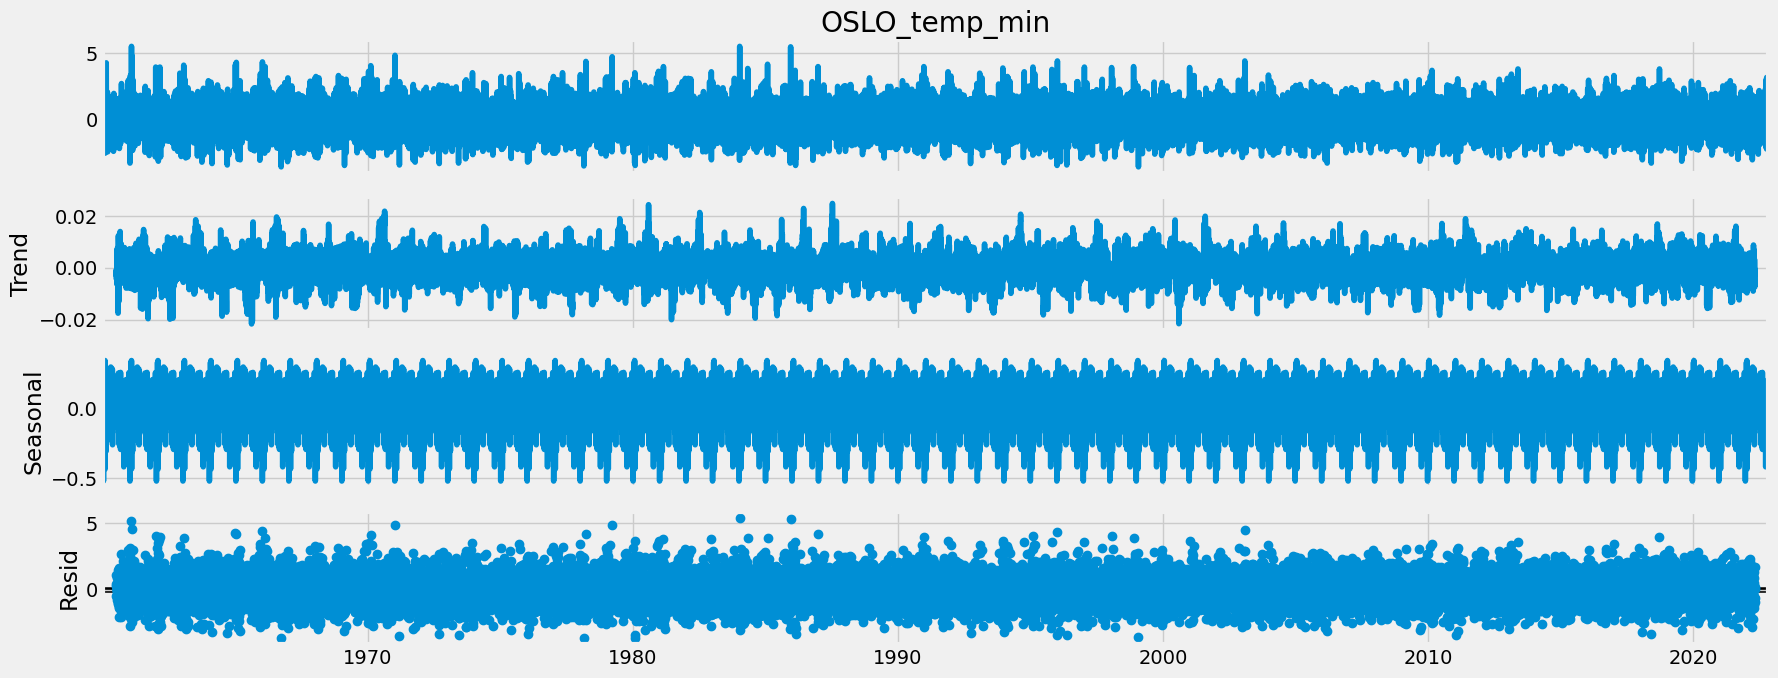

In [449]:
# Plot the separate components
decomposition_oslo_min_temp_diff_std.plot()
plt.show()

=== Augmented Dickey-Fuller Test (H0: Non-stationary) ===
Test Statistic            -21.020697
p-value                     0.000000
# Lags Used                46.000000
# Observations Used     22902.000000
Critical Value (1%)        -3.430636
Critical Value (5%)        -2.861666
Critical Value (10%)       -2.566837
dtype: float64
ADF Conclusion: Reject H0 → Series is likely STATIONARY at 5.0% confidence.

=== KPSS Test (H0: Stationary) ===
Test Statistic             0.005303
p-value                    0.100000
Lags Used                258.000000
Critical Value (10%)       0.347000
Critical Value (5%)        0.463000
Critical Value (2.5%)      0.574000
Critical Value (1%)        0.739000
dtype: float64
KPSS Conclusion: Fail to reject H0 → Series is likely STATIONARY at 5.0% confidence.



<Figure size 1000x400 with 0 Axes>

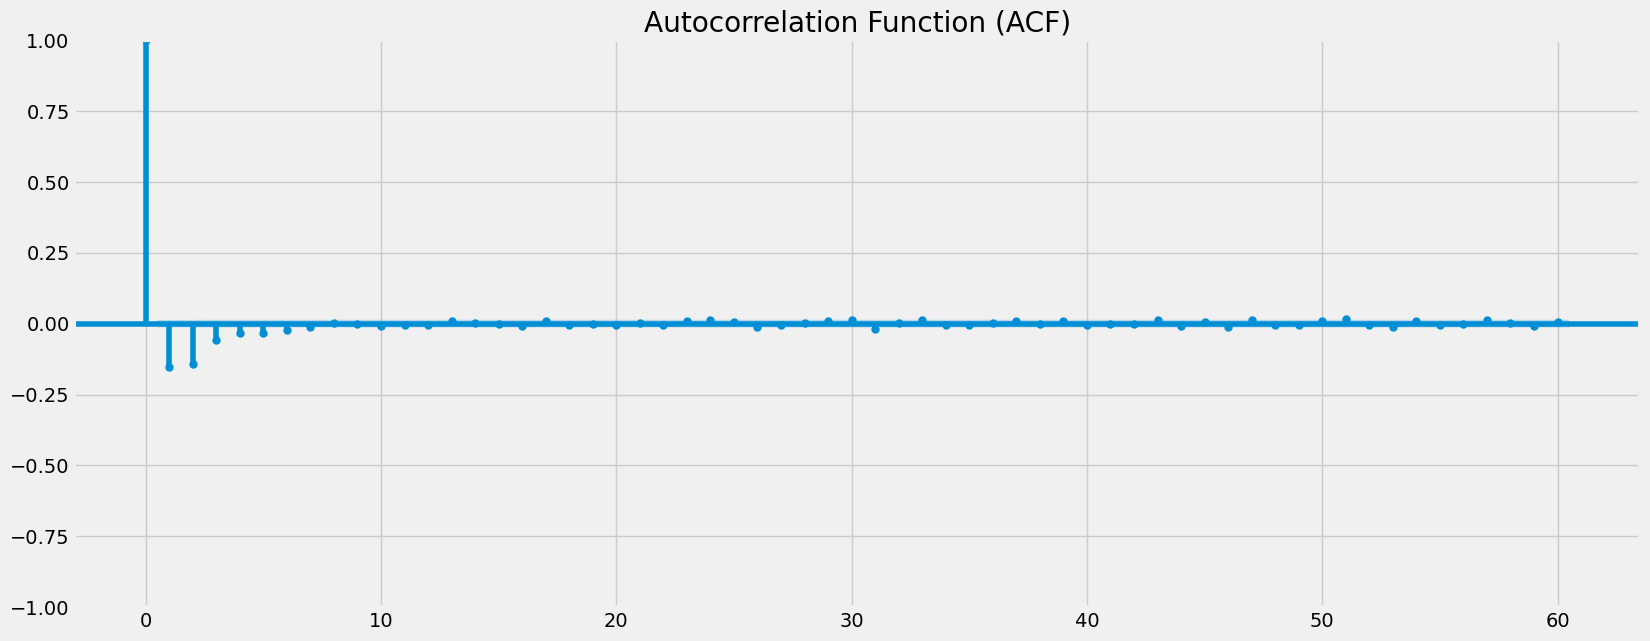

In [451]:
# Run multi-output function on MADRID daily maximum temperature
stationarity_diagnostics(weather_temp_date_diff_std['OSLO_temp_min'], lags=60)

#### Stationary.

#### Check that there are no NaNs after the weather dataset 2-step transformation.

In [459]:
weather_temp_date_diff_std.isna().sum().sum() == 0.

True

#### Confirm that in the transformed dataframe, 'DATE' is the Index, the right datatype (datetime64[ns]) and sorted ascending.

In [461]:
print(weather_temp_date_diff_std.index.name)
print(weather_temp_date_diff_std.index.dtype)

DATE
datetime64[ns]


In [465]:
weather_temp_date_diff_std.head(2)

BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  \
DATE                                                          
1960-01-02        -0.181094        1.031400       -0.240839   
1960-01-03         1.085600        0.742562       -0.060291   

            BELGRADE_temp_mean  BELGRADE_temp_min  BELGRADE_temp_max  \
DATE                                                                   
1960-01-02           -0.287909           1.197120          -0.970236   
1960-01-03            0.071768          -1.043009           0.554221   

            BUDAPEST_temp_mean  BUDAPEST_temp_min  BUDAPEST_temp_max  \
DATE                                                                   
1960-01-02           -0.046856           0.769020          -0.722596   
1960-01-03            0.186479           0.128041           0.794488   

            DEBILT_temp_mean  ...  MUNCHENB_temp_max  OSLO_temp_mean  \
DATE                          ...                                      
1960-01-02         -0.781077  ...          -0.055126         -0.6441   
1960-01-03         -0.439388  ...          -0.605280         -0.6441   

            OSLO_temp_min  OSLO_temp_max  SONNBLICK_temp_mean  \
DATE                                                            
1960-01-02      -0.353384      -0.369323            -1.442192   
1960-01-03      -0.777376      -0.664686            -0.000133   

            SONNBLICK_temp_min  SONNBLICK_temp_max  STOCKHOLM_temp_mean  \
DATE                                                                      
1960-01-02           -0.685721           -1.925978            -0.090405   
1960-01-03            0.171258           -0.145443            -0.722484   

            STOCKHOLM_temp_min  STOCKHOLM_temp_max  
DATE                                                
1960-01-02            0.331867            0.038251  
1960-01-03           -0.705376           -0.345544  

[2 rows x 39 columns]

In [467]:
weather_temp_date_diff_std.tail(2)

BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  \
DATE                                                          
2022-10-30        -0.588246       -0.619102       -0.391295   
2022-10-31        -0.859681       -0.701627       -0.571843   

            BELGRADE_temp_mean  BELGRADE_temp_min  BELGRADE_temp_max  \
DATE                                                                   
2022-10-30            0.575314           0.192924           0.748243   
2022-10-31           -0.215973           0.501908          -0.693062   

            BUDAPEST_temp_mean  BUDAPEST_temp_min  BUDAPEST_temp_max  \
DATE                                                                   
2022-10-30           -0.000189          -0.000155          -0.000175   
2022-10-31           -0.000189          -0.000155          -0.000175   

            DEBILT_temp_mean  ...  MUNCHENB_temp_max  OSLO_temp_mean  \
DATE                          ...                                      
2022-10-30         -0.683452  ...          -0.742818       -1.631596   
2022-10-31         -0.781077  ...          -1.072911        1.416762   

            OSLO_temp_min  OSLO_temp_max  SONNBLICK_temp_mean  \
DATE                                                            
2022-10-30      -1.978688      -2.252264             0.039925   
2022-10-31       1.907909       1.919742            -0.681105   

            SONNBLICK_temp_min  SONNBLICK_temp_max  STOCKHOLM_temp_mean  \
DATE                                                                      
2022-10-30            0.205538           -0.145443            -2.528424   
2022-10-31           -0.685721           -0.508818             0.993159   

            STOCKHOLM_temp_min  STOCKHOLM_temp_max  
DATE                                                
2022-10-30           -2.904331           -0.767719  
2022-10-31           -0.041540            0.076630  

[2 rows x 39 columns]

### 05. Data readiness checklist

##### Problem weather stations removed: Valentia, Kassel
##### Remaining stations & features: 13 stations x 3 features each = 39 columns
##### Datetime index: Intact and sorted ascending
##### Post-transformation: No NaNs
##### Temporal ranges of modified weather & answers datasets: Match exactly
##### Data 2-step transformations: First differencing applied to weather dataset, followed by z-score standardization
##### Stationarity verification: Decomposition plots, ADF + KPSS, ACF plots on a few representative features confirm stationarization successful

### 06. Baseline metrics

#### Comment: Baseline majority-class accuracy is the accuracy a model would reach by doing nothing but always predicting the majority class (in our case: Unpleasant e.g. "0") for every weather station and every day.  In other words: "If I built a really dumb model that just predicted "Unpleasant" every day at every station, how accurate would it be?"  This becomes our baseline to beat.  If our model only slightly outperforms this, it is not really learning patterns; rather, it's just mimicking class imbalance.

In [488]:
# Compute majority class for each station individually and calculate how often that majority class appears

baseline_accuracies = {}

for station in ans_full.columns:
    most_common = ans_full[station].mode()[0]  # Usually 0 (Unpleasant)
    baseline_accuracy = (ans_full[station] == most_common).mean()
    baseline_accuracies[station] = baseline_accuracy

# Convert to DataFrame for clarity
baseline_df = pd.DataFrame.from_dict(baseline_accuracies, orient='index', columns=['Baseline_Accuracy'])
baseline_df = baseline_df.sort_values(by='Baseline_Accuracy', ascending=False)

print(baseline_df)

                             Baseline_Accuracy
SONNBLICK_pleasant_weather            1.000000
OSLO_pleasant_weather                 0.844045
STOCKHOLM_pleasant_weather            0.830319
DEBILT_pleasant_weather               0.805700
MAASTRICHT_pleasant_weather           0.792322
MUNCHENB_pleasant_weather             0.792279
DUSSELDORF_pleasant_weather           0.785002
HEATHROW_pleasant_weather             0.783912
BASEL_pleasant_weather                0.753192
LJUBLJANA_pleasant_weather            0.722167
BUDAPEST_pleasant_weather             0.676195
BELGRADE_pleasant_weather             0.651750
MADRID_pleasant_weather               0.553488


In [490]:
# Compute one baseline majority-class accuracy number globally for the dataset

# Flatten entire answer matrix to 1D and compute baseline
y_flat = ans_full.values.flatten()
most_common = pd.Series(y_flat).mode()[0]
baseline_accuracy_total = (y_flat == most_common).mean()

print(f"Global baseline accuracy (predicting all 0s): {baseline_accuracy_total:.3f}")

Global baseline accuracy (predicting all 0s): 0.768


#### Class distribution per weather station ("0" = Unpleasant, "1" = Pleasant)

In [493]:
# Compute percentage distribution of classes for each station
class_distributions = {}

for station in ans_full.columns:
    counts = ans_full[station].value_counts(normalize=True)  # Normalize = percentage
    class_distributions[station] = {
        'Unpleasant (0)': counts.get(0, 0),
        'Pleasant (1)': counts.get(1, 0)
    }

# Convert to DataFrame
class_dist_df = pd.DataFrame(class_distributions).T
class_dist_df = class_dist_df.sort_values(by='Pleasant (1)')  # Optional: sort by minority class %

# Show results
print(class_dist_df)

                             Unpleasant (0)  Pleasant (1)
SONNBLICK_pleasant_weather         1.000000      0.000000
OSLO_pleasant_weather              0.844045      0.155955
STOCKHOLM_pleasant_weather         0.830319      0.169681
DEBILT_pleasant_weather            0.805700      0.194300
MAASTRICHT_pleasant_weather        0.792322      0.207678
MUNCHENB_pleasant_weather          0.792279      0.207721
DUSSELDORF_pleasant_weather        0.785002      0.214998
HEATHROW_pleasant_weather          0.783912      0.216088
BASEL_pleasant_weather             0.753192      0.246808
LJUBLJANA_pleasant_weather         0.722167      0.277833
BUDAPEST_pleasant_weather          0.676195      0.323805
BELGRADE_pleasant_weather          0.651750      0.348250
MADRID_pleasant_weather            0.553488      0.446512


### 07. Train/test splitting of datasets

In [502]:
from sklearn.model_selection import train_test_split

X = weather_temp_date_diff_std
y = ans_full

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, shuffle=True
)

In [504]:
# Check dimensions
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (17211, 39)
y_train shape: (17211, 13)
X_test shape: (5738, 39)
y_test shape: (5738, 13)


In [506]:
# Confirm alignment between feature and label indices
assert all(X_train.index == y_train.index)
assert all(X_test.index == y_test.index)

### Class distribution comparison (Full vs Train vs Test)

In [511]:
# Define and call a function to make the class distribution comparisons across full vs training vs testing datasets
# The point of this verification is to make sure our existing random split preserves the class imbalance structure across all stations

def compute_class_distribution(df):
    """
    For each column (station), return % of class 0 and class 1.
    """
    distributions = {}
    for station in df.columns:
        counts = df[station].value_counts(normalize=True)
        distributions[station] = {
            'Unpleasant (0)': counts.get(0, 0),
            'Pleasant (1)': counts.get(1, 0)
        }
    return pd.DataFrame(distributions).T

# Compute distributions
dist_full = compute_class_distribution(ans_full)
dist_train = compute_class_distribution(y_train)
dist_test = compute_class_distribution(y_test)

# Rename columns for clarity
dist_full.columns = ['Full_0', 'Full_1']
dist_train.columns = ['Train_0', 'Train_1']
dist_test.columns = ['Test_0', 'Test_1']

# Combine into one DataFrame
class_dist_comparison = pd.concat([dist_full, dist_train, dist_test], axis=1)

# Optional: round for readability
class_dist_comparison = class_dist_comparison.round(3)

# Optional: sort by most imbalanced in full dataset
class_dist_comparison = class_dist_comparison.sort_values(by='Full_1')

# Display
print(class_dist_comparison)

                             Full_0  Full_1  Train_0  Train_1  Test_0  Test_1
SONNBLICK_pleasant_weather    1.000   0.000    1.000    0.000   1.000   0.000
OSLO_pleasant_weather         0.844   0.156    0.845    0.155   0.841   0.159
STOCKHOLM_pleasant_weather    0.830   0.170    0.832    0.168   0.826   0.174
DEBILT_pleasant_weather       0.806   0.194    0.807    0.193   0.803   0.197
MAASTRICHT_pleasant_weather   0.792   0.208    0.794    0.206   0.788   0.212
MUNCHENB_pleasant_weather     0.792   0.208    0.793    0.207   0.790   0.210
DUSSELDORF_pleasant_weather   0.785   0.215    0.787    0.213   0.780   0.220
HEATHROW_pleasant_weather     0.784   0.216    0.786    0.214   0.778   0.222
BASEL_pleasant_weather        0.753   0.247    0.754    0.246   0.749   0.251
LJUBLJANA_pleasant_weather    0.722   0.278    0.722    0.278   0.723   0.277
BUDAPEST_pleasant_weather     0.676   0.324    0.675    0.325   0.679   0.321
BELGRADE_pleasant_weather     0.652   0.348    0.652    0.348   

#### Comment: The class distributions held across splits.  This avoid hidden bias in model evaluation, and our test dataset remains representative of the real data distribution.

#### Next up, for later baseline comparisons with model outputs, we want to show "Baseline Confusion Matrices (Predicting all 0s)".

In [515]:
from sklearn.metrics import confusion_matrix
import pandas as pd

# Dummy predictions: all 0s, same shape as y_test
y_pred_baseline = pd.DataFrame(0, index=y_test.index, columns=y_test.columns)

# Store results for each station
confusion_results = {}

for station in y_test.columns:
    cm = confusion_matrix(y_test[station], y_pred_baseline[station], labels=[0, 1])
    tn, fp, fn, tp = cm.ravel()
    confusion_results[station] = {
        'TN': tn,  # True Negative = correctly predicted 0
        'FP': fp,  # False Positive = predicted 1 but true was 0
        'FN': fn,  # False Negative = predicted 0 but true was 1
        'TP': tp   # True Positive = correctly predicted 1
    }

# Create a DataFrame for easy viewing
baseline_confusion_df = pd.DataFrame(confusion_results).T
baseline_confusion_df = baseline_confusion_df[['TN', 'FP', 'FN', 'TP']]  # Order columns
print(baseline_confusion_df)

                               TN  FP    FN  TP
BASEL_pleasant_weather       4300   0  1438   0
BELGRADE_pleasant_weather    3739   0  1999   0
BUDAPEST_pleasant_weather    3894   0  1844   0
DEBILT_pleasant_weather      4608   0  1130   0
DUSSELDORF_pleasant_weather  4476   0  1262   0
HEATHROW_pleasant_weather    4462   0  1276   0
LJUBLJANA_pleasant_weather   4151   0  1587   0
MAASTRICHT_pleasant_weather  4522   0  1216   0
MADRID_pleasant_weather      3172   0  2566   0
MUNCHENB_pleasant_weather    4534   0  1204   0
OSLO_pleasant_weather        4827   0   911   0
SONNBLICK_pleasant_weather   5738   0     0   0
STOCKHOLM_pleasant_weather   4738   0  1000   0


### 08. Decision tree classification algorithm

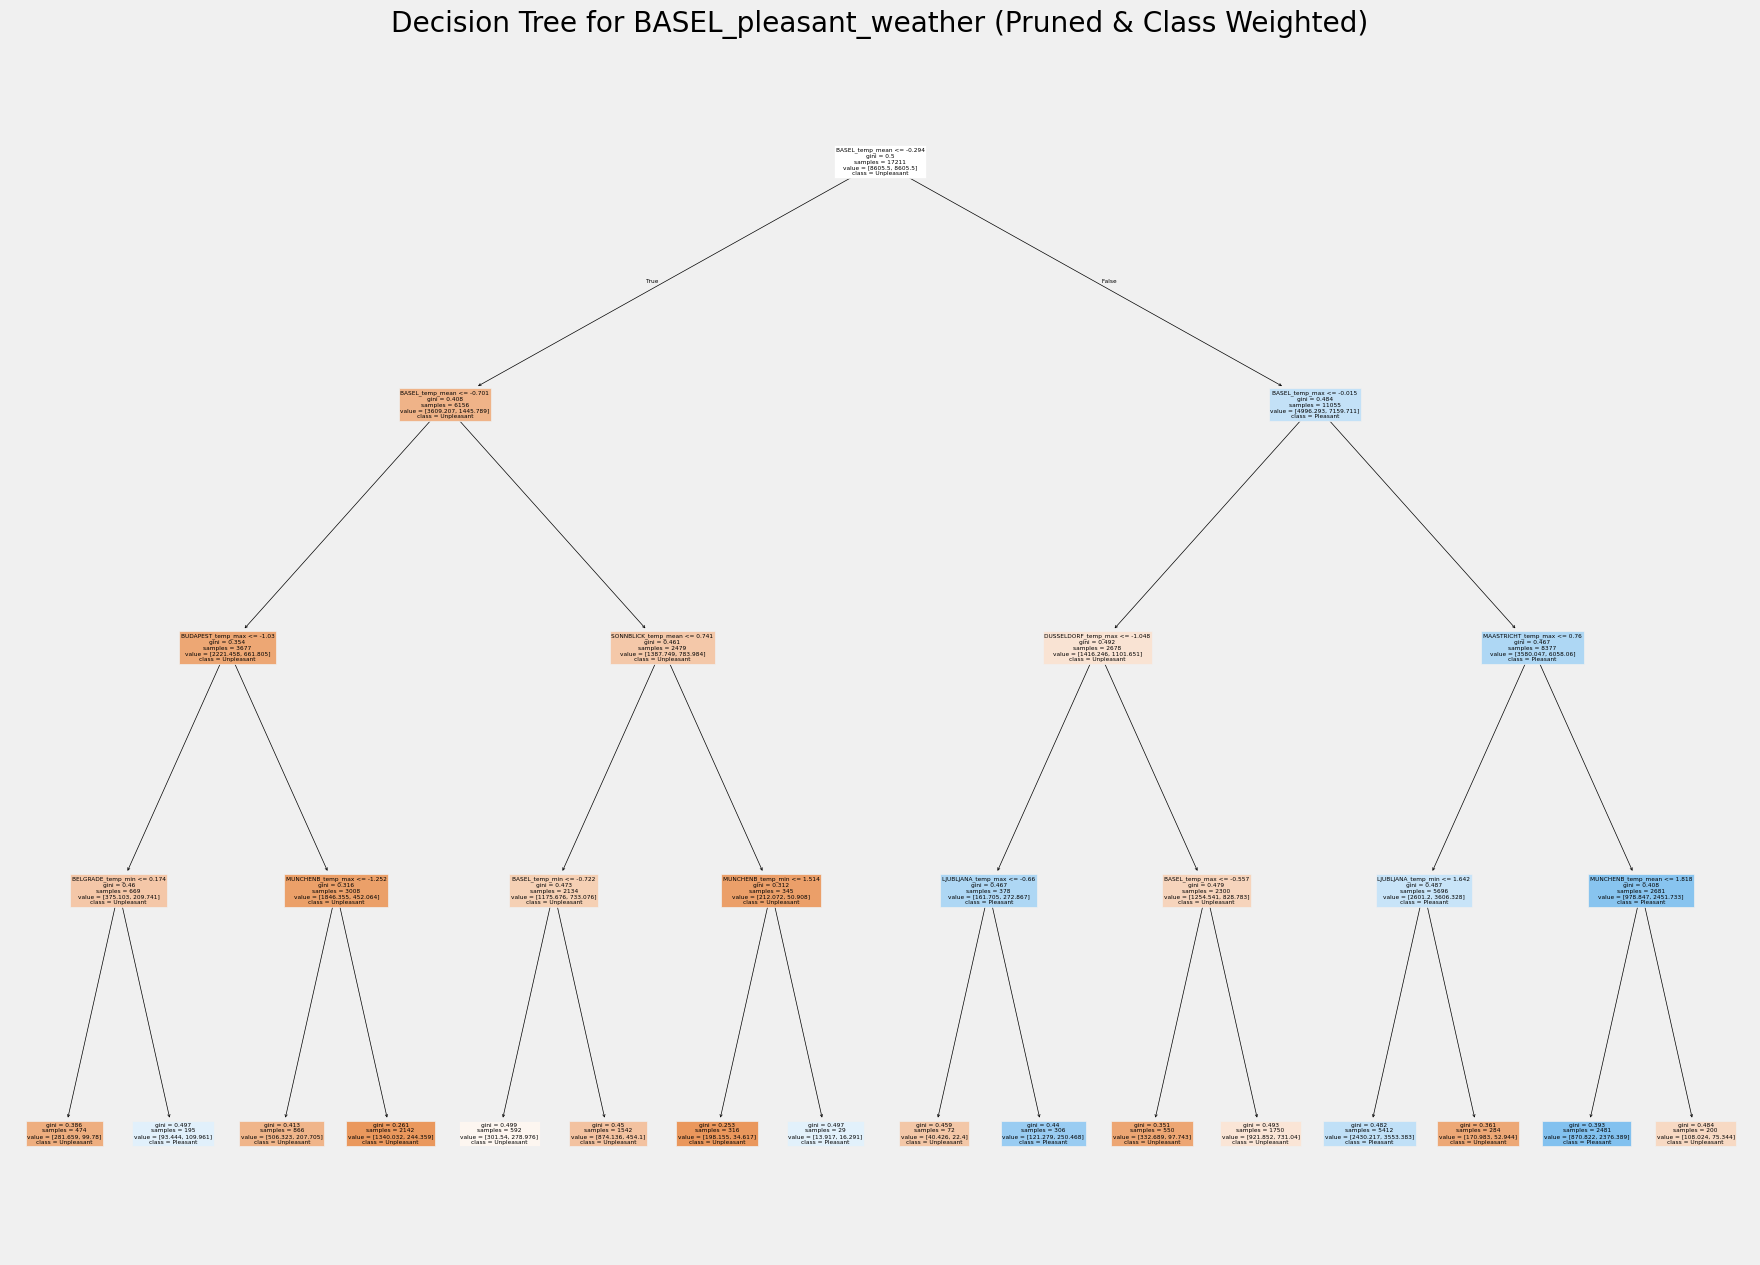

In [521]:
# We choose 'BASEL_pleasant_weather' as the target for this specific model
# criterion='gini' is already the default, but explicit is good
# max_depth=4 will limit the tree's growth
# min_samples_split=10 will require more samples to make a split
# min_samples_leaf=10 will ensure leaf nodes are not too small
# class_weight='balanced' will handle the class imbalance (~ 75/25 for BASEL in the answers dataset) during training

# IMPORTANT: Select one target column for both training and testing
target_station_column = 'BASEL_pleasant_weather' # Choose the target station
y_train_single_target = y_train[target_station_column].astype(int)
y_test_single_target = y_test[target_station_column].astype(int) # Note

# --- Train the model with adjusted parameters ---
weather_dt = DecisionTreeClassifier(criterion='gini',
                                    max_depth=4, # Set max depth
                                    min_samples_split=10, # Set min samples to split
                                    min_samples_leaf=10, # Set min samples at leaf nodes
                                    class_weight='balanced', # Adjust class weights for imbalance
                                    random_state=42) # For reproducibility

# Fit the model using the single target column of scaled training data
weather_dt.fit(X_train, y_train_single_target)

# Visualize the "pruned" Decision Tree
plt.figure(figsize=(20,15))
# class_names should reflect the binary labels of the chosen target column
plot_tree(weather_dt, filled=True, feature_names=X_train.columns, class_names=['Unpleasant', 'Pleasant'])
plt.title(f"Decision Tree for {target_station_column} (Pruned & Class Weighted)")
plt.show()

#### Define the various evaluation metrics and logic

In [524]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    balanced_accuracy_score,
    ConfusionMatrixDisplay,
)

def evaluate_model_per_station(model, X_train, y_train_df, X_test, y_test_df, station_column):
    """
    Evaluate a trained classification model on a specific weather station target column.
    Returns detailed metrics and side-by-side confusion matrices for Train and Test sets.
    """

    # Select binary target column (for one station)
    y_train = y_train_df[station_column].astype(int)
    y_test = y_test_df[station_column].astype(int)

    # Predict
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Internal function to compute all key metrics
    def compute_metrics(y_true, y_pred, dataset_name):
        cm = confusion_matrix(y_true, y_pred)
        tn, fp, fn, tp = cm.ravel()
        precision = precision_score(y_true, y_pred, zero_division=0)
        recall = recall_score(y_true, y_pred, zero_division=0)
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        f1 = f1_score(y_true, y_pred, zero_division=0)
        balanced_acc = balanced_accuracy_score(y_true, y_pred)
        overall_acc = (tp + tn) / (tp + tn + fp + fn)

        return {
            "Dataset": dataset_name,
            "Overall Accuracy": overall_acc,
            "Recall (Pleasant)": recall,
            "Precision (Pleasant)": precision,
            "Specificity (Unpleasant)": specificity,
            "F1 Score (Pleasant)": f1,
            "Balanced Accuracy": balanced_acc,
            "TP": tp,
            "FP": fp,
            "TN": tn,
            "FN": fn,
        }

    # Compute for both sets
    train_metrics = compute_metrics(y_train, y_pred_train, "Train")
    test_metrics = compute_metrics(y_test, y_pred_test, "Test")
    metrics_df = pd.DataFrame([train_metrics, test_metrics]).set_index("Dataset")

    # Plot side-by-side confusion matrices
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train,
                                            display_labels=["Unpleasant", "Pleasant"],
                                            cmap="Greens", ax=axes[0])
    axes[0].set_title(f"Train Confusion Matrix\n({station_column})")
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test,
                                            display_labels=["Unpleasant", "Pleasant"],
                                            cmap="Blues", ax=axes[1])
    axes[1].set_title(f"Test Confusion Matrix\n({station_column})")
    plt.tight_layout()

    return metrics_df

#### Call the multi-output custom evaluation function

Overall Accuracy  Recall (Pleasant)  Precision (Pleasant)  \
Dataset                                                              
Train            0.624949           0.732844              0.367684   
Test             0.612757           0.700278              0.359900   

         Specificity (Unpleasant)  F1 Score (Pleasant)  Balanced Accuracy  \
Dataset                                                                     
Train                    0.589834             0.489683           0.661339   
Test                     0.583488             0.475449           0.641883   

           TP    FP    TN    FN  
Dataset                          
Train    3097  5326  7659  1129  
Test     1007  1791  2509   431

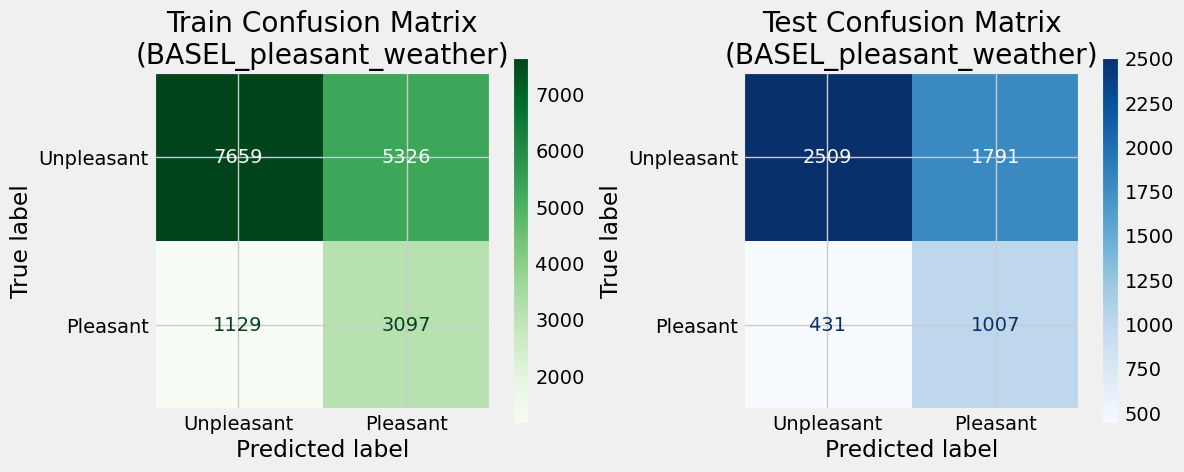

In [527]:
evaluate_model_per_station(
    model=weather_dt,
    X_train=X_train,          # This is already the z-score standardized differenced weather data
    y_train_df=y_train,       # This is the answers dataset, same shape
    X_test=X_test,
    y_test_df=y_test,
    station_column="BASEL_pleasant_weather"  # Change this to any of the 13 weather station target columns
)

### Because the resulting scores (above) are underwhelming, we will run GridSearchCV on reduced inputs to try to find the best hyperparameters (based on the input selections) and return cross-validation scores.

In [535]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import balanced_accuracy_score

# Extract the single station's target
target_station_column = 'BASEL_pleasant_weather'
y_train_single_target = y_train[target_station_column].astype(int)

# Set up the model
dt = DecisionTreeClassifier(random_state=42)

# Reduced grid for practical runtime
param_grid = {
    'max_depth': [3, 4, 5],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [5, 10],
    'class_weight': ['balanced']
}

# Use StratifiedKFold to preserve class imbalance in folds
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Run the Grid Search
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    scoring='balanced_accuracy',
    cv=cv,
    n_jobs=-1,        # Use all available cores
    verbose=1         # Shows progress in notebook
)

# Fit the model
grid_search.fit(X_train, y_train_single_target)

# Output the best result
print("✅ Best Parameters Found:")
print(grid_search.best_params_)
print(f"Best Balanced Accuracy Score: {grid_search.best_score_:.4f}")

Fitting 3 folds for each of 12 candidates, totalling 36 fits
✅ Best Parameters Found:
{'class_weight': 'balanced', 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 5}
Best Balanced Accuracy Score: 0.6522


#### Let's expand the hyperparameter grid slightly, giving the model more flexibility, to see if we can improve on the Best Balanced Accuracy Score, which is not bad (it uses a strict evaluation standard), but will not turn heads and is not deployable if we were building a production-level classifier.

In [538]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import balanced_accuracy_score

# Extract the single station's target
target_station_column = 'BASEL_pleasant_weather'
y_train_single_target = y_train[target_station_column].astype(int)

# Set up the model
dt = DecisionTreeClassifier(random_state=42)

# Reduced grid for practical runtime
param_grid = {
    'max_depth': [4, 5, 6, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [5, 10, 20],
    'criterion': ['gini', 'entropy'],
    'class_weight': ['balanced']
}

# Use StratifiedKFold to preserve class imbalance in folds
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Run the Grid Search
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    scoring='balanced_accuracy',
    cv=cv,
    n_jobs=-1,        # Use all available cores
    verbose=1         # Shows progress in notebook
)

# Fit the model
grid_search.fit(X_train, y_train_single_target)

# Output the best result
print("✅ Best Parameters Found:")
print(grid_search.best_params_)
print(f"Best Balanced Accuracy Score: {grid_search.best_score_:.4f}")

Fitting 3 folds for each of 72 candidates, totalling 216 fits
✅ Best Parameters Found:
{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 20, 'min_samples_split': 2}
Best Balanced Accuracy Score: 0.6536


#### Based on the "plateau" we're hitting on the Best Balanced Accuracy Score, despite the expanded-inputs GridSearchCV, let's try a separate path by exploring features importance, to see whether feature reduction is advisable to reduce complexity and improve model performance further -- if viable.

Top 15 Features by Importance:

BASEL_temp_mean         0.3499
BASEL_temp_max          0.1147
LJUBLJANA_temp_min      0.0470
MUNCHENB_temp_max       0.0454
MAASTRICHT_temp_max     0.0424
LJUBLJANA_temp_mean     0.0382
DUSSELDORF_temp_max     0.0334
MUNCHENB_temp_mean      0.0276
SONNBLICK_temp_min      0.0256
BASEL_temp_min          0.0251
MUNCHENB_temp_min       0.0248
MAASTRICHT_temp_mean    0.0212
LJUBLJANA_temp_max      0.0210
OSLO_temp_mean          0.0194
MADRID_temp_max         0.0183
dtype: float64


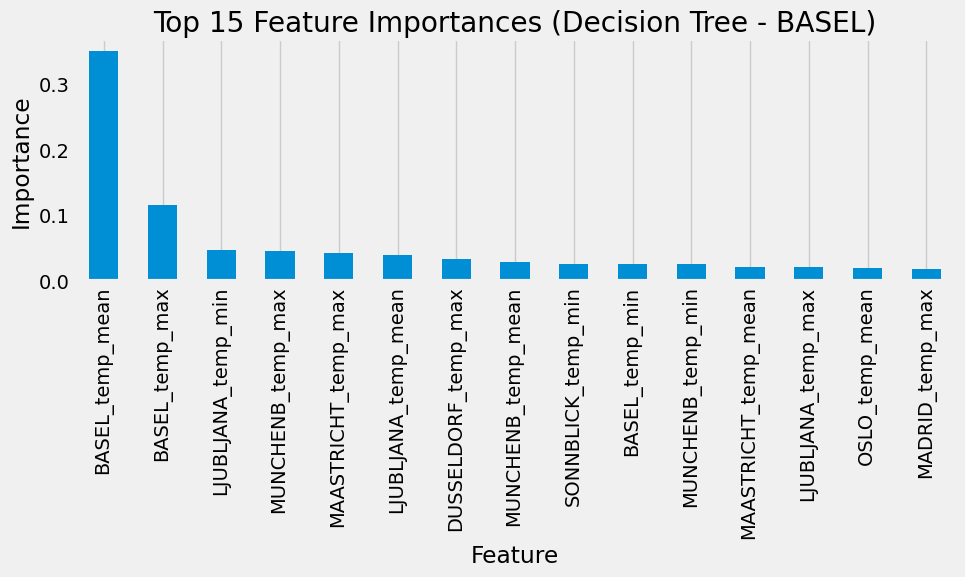

In [542]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# Step 1: Re-fit the best model from GridSearchCV
best_dt = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=7,
    min_samples_leaf=20,
    min_samples_split=2,
    class_weight='balanced',
    random_state=42
)

# Use one station's y values (e.g., BASEL) for single-target fitting
target_station_column = 'BASEL_pleasant_weather'
y_train_single_target = y_train[target_station_column].astype(int)

# Fit model
best_dt.fit(X_train, y_train_single_target)

# Step 2: Extract and sort feature importances
importances = pd.Series(best_dt.feature_importances_, index=X_train.columns)
importances = importances.sort_values(ascending=False)

# Step 3: Display top 15 features
print("Top 15 Features by Importance:\n")
print(importances.head(15).round(4))

# Step 4: Plot
plt.figure(figsize=(10, 6))
importances.head(15).plot(kind='bar')
plt.title("Top 15 Feature Importances (Decision Tree - BASEL)")
plt.ylabel("Importance")
plt.xlabel("Feature")
plt.tight_layout()
plt.grid(axis='y')
plt.show()

### Conclusion: The minimum temperature feature appears non-essential for classification performance and can be dropped.

#### Next step: drop the temp_min columns in the training dataset, then re-rerun GridSearchCV on the feature-reduced training dataset.

In [546]:
# Remove all temp_min columns
X_train_reduced = X_train.loc[:, ~X_train.columns.str.endswith('temp_min')]

# Confirm shape and preview
print("Reduced Feature Set Shape:", X_train_reduced.shape)
print("Remaining Features:", X_train_reduced.columns.tolist())

Reduced Feature Set Shape: (17211, 26)
Remaining Features: ['BASEL_temp_mean', 'BASEL_temp_max', 'BELGRADE_temp_mean', 'BELGRADE_temp_max', 'BUDAPEST_temp_mean', 'BUDAPEST_temp_max', 'DEBILT_temp_mean', 'DEBILT_temp_max', 'DUSSELDORF_temp_mean', 'DUSSELDORF_temp_max', 'HEATHROW_temp_mean', 'HEATHROW_temp_max', 'LJUBLJANA_temp_mean', 'LJUBLJANA_temp_max', 'MAASTRICHT_temp_mean', 'MAASTRICHT_temp_max', 'MADRID_temp_mean', 'MADRID_temp_max', 'MUNCHENB_temp_mean', 'MUNCHENB_temp_max', 'OSLO_temp_mean', 'OSLO_temp_max', 'SONNBLICK_temp_mean', 'SONNBLICK_temp_max', 'STOCKHOLM_temp_mean', 'STOCKHOLM_temp_max']


#### Re-run GridSearchCV on the reduced-features training dataset.

Top 15 Features by Importance:

BASEL_temp_mean        0.3753
BASEL_temp_max         0.1209
MUNCHENB_temp_max      0.0651
LJUBLJANA_temp_mean    0.0575
SONNBLICK_temp_mean    0.0500
MAASTRICHT_temp_max    0.0456
DUSSELDORF_temp_max    0.0439
MUNCHENB_temp_mean     0.0427
BUDAPEST_temp_mean     0.0340
OSLO_temp_mean         0.0313
DEBILT_temp_max        0.0277
MADRID_temp_max        0.0214
BELGRADE_temp_max      0.0156
LJUBLJANA_temp_max     0.0122
MADRID_temp_mean       0.0098
dtype: float64


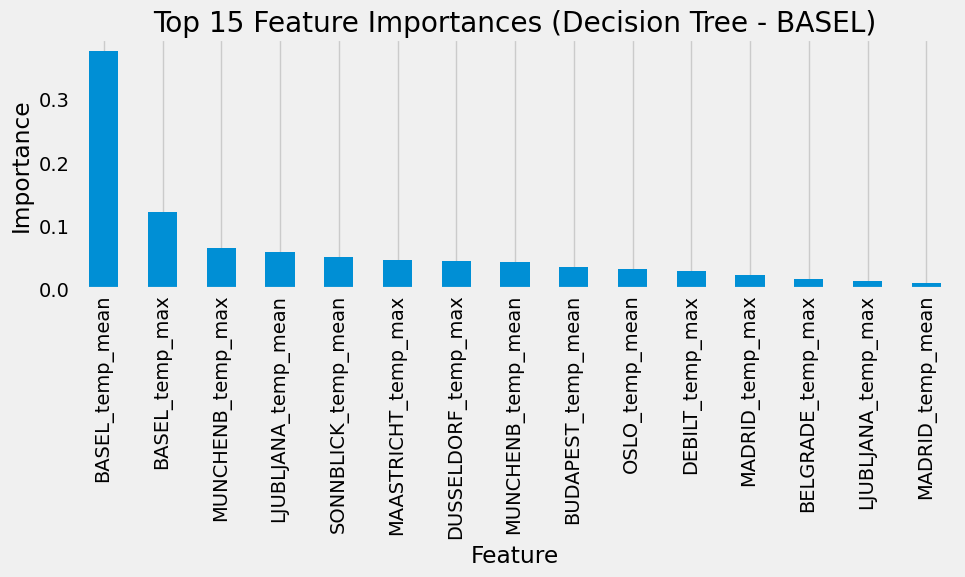

In [553]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# Step 1: Re-fit the best model from GridSearchCV
best_dt = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=7,
    min_samples_leaf=20,
    min_samples_split=2,
    class_weight='balanced',
    random_state=42
)

# Use one station's y values (e.g., BASEL) for single-target fitting
target_station_column = 'BASEL_pleasant_weather'
y_train_single_target = y_train[target_station_column].astype(int)

# Fit model
best_dt.fit(X_train_reduced, y_train_single_target)

# Step 2: Extract and sort feature importances
importances = pd.Series(best_dt.feature_importances_, index=X_train_reduced.columns)
importances = importances.sort_values(ascending=False)

# Step 3: Display top 15 features
print("Top 15 Features by Importance:\n")
print(importances.head(15).round(4))

# Step 4: Plot
plt.figure(figsize=(10, 6))
importances.head(15).plot(kind='bar')
plt.title("Top 15 Feature Importances (Decision Tree - BASEL)")
plt.ylabel("Importance")
plt.xlabel("Feature")
plt.tight_layout()
plt.grid(axis='y')
plt.show()

#### Re-instantiate the DecisionTreeClassifier model with the best parameters (so far), and train it on the reduced features training dataset.

In [559]:
from sklearn.tree import DecisionTreeClassifier

# Best parameters from reduced feature GridSearch
best_dt = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=7,
    min_samples_leaf=20,
    min_samples_split=2,
    class_weight='balanced',
    random_state=42
)

# Train it on the reduced feature set
best_dt.fit(X_train_reduced, y_train['BASEL_pleasant_weather'])

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=7, min_samples_leaf=20, random_state=42)

#### Re-run the upgraded evaluation function

Overall Accuracy  Recall (Pleasant)  Precision (Pleasant)  \
Dataset                                                              
Train            0.667364           0.712021              0.400293   
Test             0.642036           0.666898              0.378453   

         Specificity (Unpleasant)  F1 Score (Pleasant)  Balanced Accuracy  \
Dataset                                                                     
Train                    0.652830             0.512476           0.682426   
Test                     0.633721             0.482880           0.650310   

           TP    FP    TN    FN  
Dataset                          
Train    3009  4508  8477  1217  
Test      959  1575  2725   479

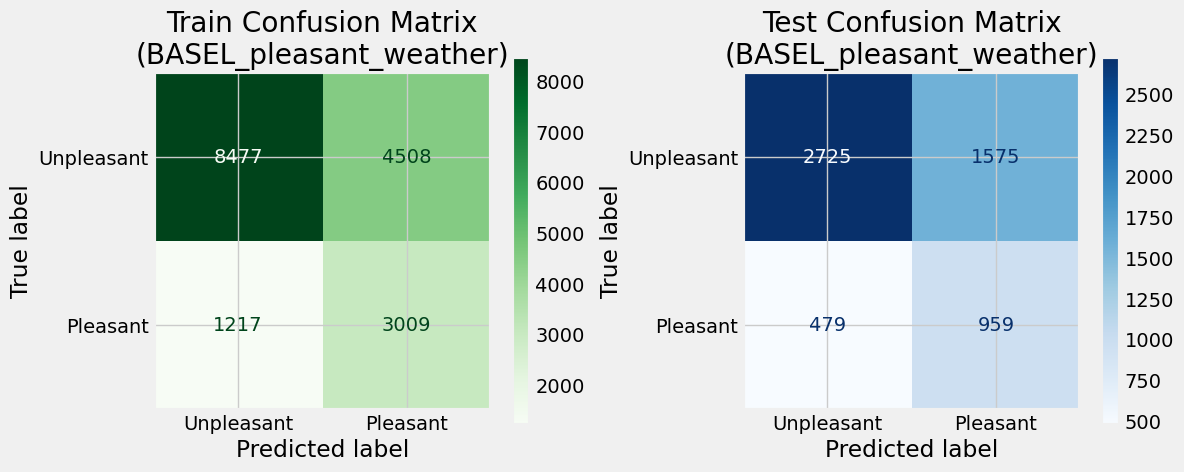

In [562]:
evaluate_model_per_station(
    model=best_dt,
    X_train=X_train_reduced,
    y_train_df=y_train,
    X_test=X_test[X_train_reduced.columns],  # Reduce test set to same 26 columns
    y_test_df=y_test,
    station_column='BASEL_pleasant_weather'
)

#### Slightly better performance, and tradeoffs. Simpler (feature reduction), more interpretable, generalizing better, reduces overfitting slightly, gives better Precision for "Pleasant" days.

#### Plot learning curves to assess likelihood of overfitting, underfitting or neither.  This uses learning_curve from sklearn.model_selection and evaluates the model across increasing training set sizes.

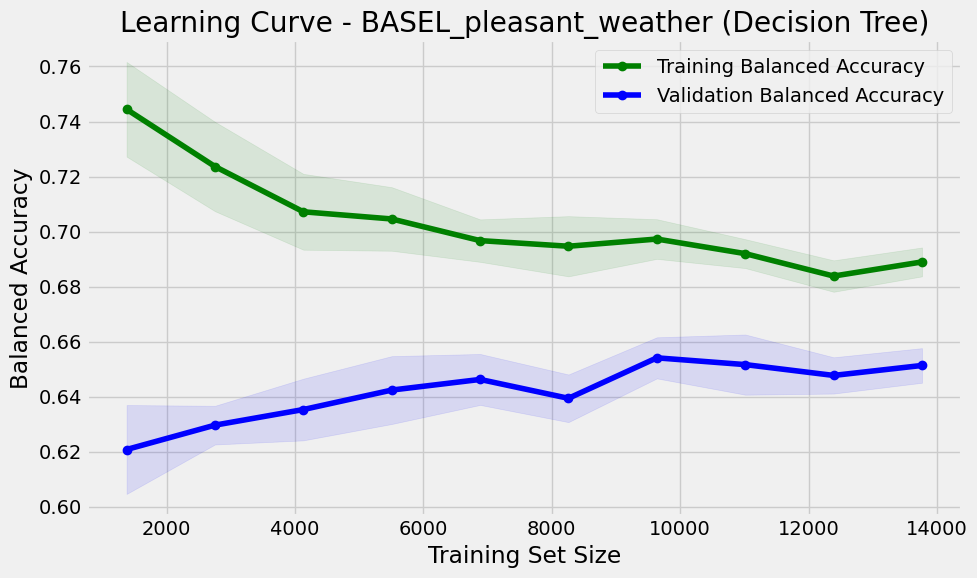

In [567]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeClassifier

# --- Model Setup: Use best parameters from GridSearchCV ---
dt_model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=7,
    min_samples_leaf=20,
    min_samples_split=2,
    class_weight='balanced',
    random_state=42
)

# --- Target column for BASEL ---
target_station_column = 'BASEL_pleasant_weather'
y_train_basel = y_train[target_station_column].astype(int)

# --- Generate Learning Curves ---
train_sizes, train_scores, val_scores = learning_curve(
    dt_model,
    X_train_reduced,  # reduced feature set
    y_train_basel,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='balanced_accuracy',
    n_jobs=-1,
    shuffle=True,
    random_state=42
)

# --- Compute mean and std deviation ---
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# --- Plot the learning curves ---
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='green', label='Training Balanced Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='green')

plt.plot(train_sizes, val_mean, 'o-', color='blue', label='Validation Balanced Accuracy')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='blue')

plt.xlabel('Training Set Size')
plt.ylabel('Balanced Accuracy')
plt.title('Learning Curve - BASEL_pleasant_weather (Decision Tree)')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

### 09. Export processed datasets

In [573]:
# Check dimensions
print("X_train shape:", X_train.shape)
print("X_train_reduced shape:", X_train_reduced.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (17211, 39)
X_train_reduced shape: (17211, 26)
y_train shape: (17211, 13)
X_test shape: (5738, 39)
y_test shape: (5738, 13)


In [576]:
# Export the processed datasets to be used in calculating DT model results for other weather stations
X_train.to_pickle(os.path.join(path, 'X_train.pkl'))
X_train_reduced.to_pickle(os.path.join(path, 'X_train_reduced.pkl'))
y_train.to_pickle(os.path.join(path, 'y_train.pkl'))
X_test.to_pickle(os.path.join(path, 'X_test.pkl'))
y_test.to_pickle(os.path.join(path, 'y_test.pkl'))